# Features and Definitions

1. **DATE ADDED TO CATALOG**: Date the study was added to the GWAS catalog.  
2. **PUBMEDID**: Unique identifier for the publication in PubMed.  
3. **FIRST AUTHOR**: Name of the first author of the study.  
4. **DATE**: Publication date of the study.  
5. **JOURNAL**: Journal where the study was published.  
6. **LINK**: URL to the publication or related resource.  
7. **STUDY**: Description of the study.  
8. **DISEASE/TRAIT**: Disease or trait studied.  
9. **INITIAL SAMPLE SIZE**: Size of the initial sample used in the study.  
10. **REPLICATION SAMPLE SIZE**: Size of the replication sample used to validate findings.  
11. **REGION**: Genomic region associated with the findings.  
12. **CHR_ID**: Chromosome ID where the SNP is located.  
13. **CHR_POS**: Chromosomal position of the SNP.  
14. **REPORTED GENE(S)**: Genes reported in the study related to the SNP.  
15. **MAPPED_GENE**: Genes mapped to the SNP.  
16. **UPSTREAM_GENE_ID**: Gene ID upstream of the SNP.  
17. **DOWNSTREAM_GENE_ID**: Gene ID downstream of the SNP.  
18. **SNP_GENE_IDS**: IDs of genes related to the SNP.  
19. **UPSTREAM_GENE_DISTANCE**: Distance from the SNP to the upstream gene.  
20. **DOWNSTREAM_GENE_DISTANCE**: Distance from the SNP to the downstream gene.  
21. **STRONGEST SNP-RISK ALLELE**: SNP and risk allele with the strongest association.  
22. **SNPS**: Single Nucleotide Polymorphisms studied.  
23. **MERGED**: Indicator if the SNP was merged with others.  
24. **SNP_ID_CURRENT**: Current identifier for the SNP.  
25. **CONTEXT**: Genomic context of the SNP (e.g., intronic, exonic).  
26. **INTERGENIC**: Indicates if the SNP is between genes.  
27. **RISK ALLELE FREQUENCY**: Frequency of the risk allele in the population.  
28. **P-VALUE**: Statistical significance of the SNP association.  
29. **PVALUE_MLOG**: -log10 transformation of the p-value.  
30. **P-VALUE (TEXT)**: P-value as text.  
31. **OR or BETA**: Effect size or odds ratio for the SNP.  
32. **95% CI (TEXT)**: Confidence interval for the effect size or odds ratio.  
33. **PLATFORM [SNPS PASSING QC]**: Genotyping platform used and SNPs passing quality control.  
34. **CNV**: Copy number variation information.

# Features Relationships in Dataset

# Importing Libraries

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Processing/Statistics
import re
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import spacy
from nltk.util import ngrams
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
import plotly.graph_objects as go
from spacy import displacy

# Warnings
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exploratory Data Analysis (EDA) and Cleaning

Reading Data

In [2]:
genetic_df = pd.read_csv(r"/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/datasets/genetic/filtered_diabetes_data.csv")

First rows

In [3]:
genetic_df.head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,2010-09-28,20818381,Yamauchi T,2010-09-05,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/20818381,A genome-wide association study in the Japanes...,Type 2 diabetes,"4,470 Japanese ancestry cases, 3,071 Japanese ...","10,692 Japanese ancestry cases, 9,597 Japanese...",...,intergenic_variant,1.0,0.58,9.000000e-14,13.045757,NaN,1.11,[1.08-1.14],Illumina [459359],N
1,2013-01-23,23137000,Lin HJ,2012-11-09,Ophthalmic Genet,www.ncbi.nlm.nih.gov/pubmed/23137000,Novel susceptibility genes associated with dia...,Cataracts in type 2 diabetes,"109 Han Chinese ancestry cases, 649 Han Chines...",NaN,...,intron_variant,0.0,NR,3.000000e-06,5.522879,NaN,NaN,NaN,Illumina [517401],N
2,2013-01-23,23137000,Lin HJ,2012-11-09,Ophthalmic Genet,www.ncbi.nlm.nih.gov/pubmed/23137000,Novel susceptibility genes associated with dia...,Cataracts in type 2 diabetes,"109 Han Chinese ancestry cases, 649 Han Chines...",NaN,...,intron_variant,0.0,NR,5.000000e-06,5.301030,NaN,NaN,NaN,Illumina [517401],N
3,2015-01-21,24974787,Meng W,2014-06-26,Eur J Pain,www.ncbi.nlm.nih.gov/pubmed/24974787,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,"572 European ancestry cases, 2,491 European an...",NaN,...,intergenic_variant,1.0,0.7092,2.000000e-07,6.698970,NaN,1.49,[NR],"Affymetrix, Illumina [6494962] (imputed)",N
4,2015-01-21,24974787,Meng W,2014-06-26,Eur J Pain,www.ncbi.nlm.nih.gov/pubmed/24974787,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,"572 European ancestry cases, 2,491 European an...",NaN,...,intergenic_variant,1.0,0.12,1.000000e-06,6.000000,NaN,2.26,[NR],"Affymetrix, Illumina [6494962] (imputed)",N


Last rows

In [4]:
genetic_df.tail()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
6609,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"43 African American or Afro-Caribbean cases, 5...",NaN,...,intron_variant,0.0,0.05,5.000000e-07,6.301030,NaN,10.19,[4.12-25.21],NR [9666030],N
6610,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"261 European ancestry cases, 2,841 European an...",NaN,...,intron_variant,0.0,0.15,1.000000e-07,7.000000,NaN,NaN,NaN,NR [8986646],N
6611,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"261 European ancestry cases, 2,841 European an...",NaN,...,intergenic_variant,1.0,0.1,5.000000e-08,7.301030,NaN,NaN,NaN,NR [8986646],N
6612,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"261 European ancestry cases, 2,841 European an...",NaN,...,intergenic_variant,1.0,0.05,6.000000e-09,8.221849,NaN,NaN,NaN,NR [8986646],N
6613,2024-05-24,38652878,Im C,2024-04-23,J Clin Oncol,www.ncbi.nlm.nih.gov/pubmed/38652878,Trans-Ancestral Genetic Risk Factors for Treat...,Type 2 diabetes in childhood cancer survivors,"261 European ancestry cases, 2,841 European an...",NaN,...,intron_variant,0.0,0.05,2.000000e-07,6.698970,NaN,NaN,NaN,NR [8986646],N


Dropping redundant columns

In [5]:
# Drop the specified columns
columns_to_drop = [
    'DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 
    'DATE', 'JOURNAL', 'LINK', 'REPLICATION SAMPLE SIZE', 
    'REPORTED GENE(S)', 'SNP_ID_CURRENT', 'P-VALUE (TEXT)', 'CNV'
]

genetic_df = genetic_df.drop(columns=columns_to_drop)
genetic_df.head(1)

,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REGION,CHR_ID,CHR_POS,MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,...,SNPS,MERGED,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC]
0,A genome-wide association study in the Japanes...,Type 2 diabetes,"4,470 Japanese ancestry cases, 3,071 Japanese ...",15q22.2,15,62104190,NPM1P47 - C2CD4B,ENSG00000259466,ENSG00000205502,NaN,...,rs7172432,0.0,intergenic_variant,1.0,0.58,9.000000e-14,13.045757,1.11,[1.08-1.14],Illumina [459359]


Checking value counts of each column

In [6]:
# Check value counts for each column
for column in genetic_df.columns:
    print(f"Value counts for {column}:\n{genetic_df[column].value_counts()}\n")

Value counts for STUDY:
STUDY
Discovery of 318 new risk loci for type 2 diabetes and related vascular outcomes among 1.4 million participants in a multi-ancestry meta-analysis.    1345
Multi-ancestry genetic study of type 2 diabetes highlights the power of diverse populations for discovery and translation.                             827
Fine-mapping type 2 diabetes loci to single-variant resolution using high-density imputation and islet-specific epigenome maps.                        400
Genome-wide discovery for diabetes-dependent triglycerides-associated loci.                                                                            334
A cross-population atlas of genetic associations for 220 human phenotypes.                                                                             313
                                                                                                                                                      ... 
Genome-wide association study in a Chine

Concise Summary of Data

In [7]:
genetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6614 entries, 0 to 6613
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STUDY                       6614 non-null   object 
 1   DISEASE/TRAIT               6614 non-null   object 
 2   INITIAL SAMPLE SIZE         6614 non-null   object 
 3   REGION                      6245 non-null   object 
 4   CHR_ID                      6245 non-null   object 
 5   CHR_POS                     6245 non-null   object 
 6   MAPPED_GENE                 6245 non-null   object 
 7   UPSTREAM_GENE_ID            2109 non-null   object 
 8   DOWNSTREAM_GENE_ID          2109 non-null   object 
 9   SNP_GENE_IDS                4105 non-null   object 
 10  UPSTREAM_GENE_DISTANCE      2109 non-null   float64
 11  DOWNSTREAM_GENE_DISTANCE    2109 non-null   float64
 12  STRONGEST SNP-RISK ALLELE   6614 non-null   object 
 13  SNPS                        6614 

Checking and Dropping duplicates

In [8]:
# Check the number of duplicate rows before dropping
duplicates_before = genetic_df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates_before}")

# Drop duplicate rows
genetic_df = genetic_df.drop_duplicates()

# Check the number of duplicate rows after dropping
duplicates_after = genetic_df.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicates_after}")

Number of duplicate rows before dropping: 4
Number of duplicate rows after dropping: 0


Checking missing values

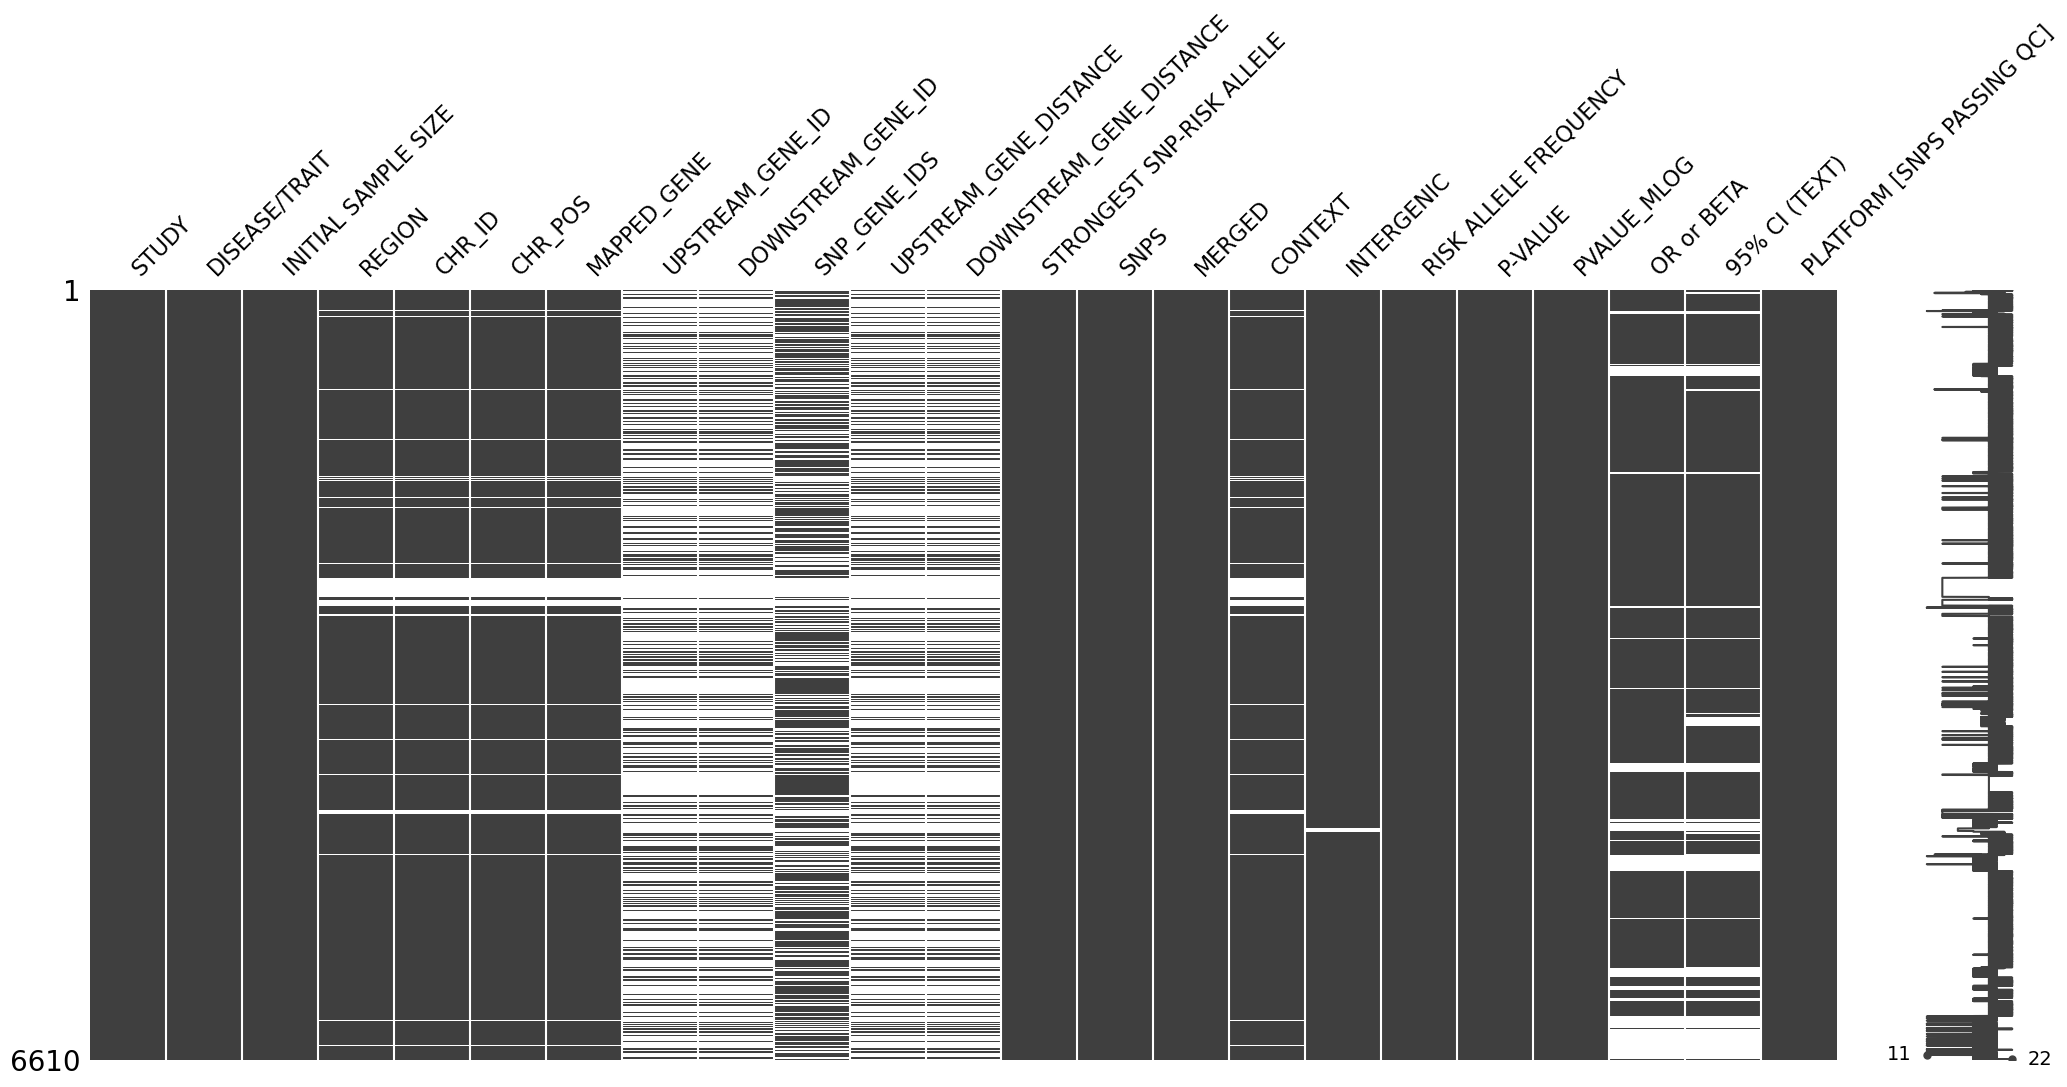

STUDY                            0
DISEASE/TRAIT                    0
INITIAL SAMPLE SIZE              0
REGION                         369
CHR_ID                         369
CHR_POS                        369
MAPPED_GENE                    369
UPSTREAM_GENE_ID              4502
DOWNSTREAM_GENE_ID            4502
SNP_GENE_IDS                  2508
UPSTREAM_GENE_DISTANCE        4502
DOWNSTREAM_GENE_DISTANCE      4502
STRONGEST SNP-RISK ALLELE        0
SNPS                             0
MERGED                           0
CONTEXT                        369
INTERGENIC                      31
RISK ALLELE FREQUENCY            0
P-VALUE                          0
PVALUE_MLOG                      0
OR or BETA                     983
95% CI (TEXT)                 1159
PLATFORM [SNPS PASSING QC]       0
dtype: int64

In [9]:
msno.matrix(genetic_df)
plt.show()

genetic_df.isnull().sum()

Dropping missing values of gene related columns

In [10]:
# Since they are all related we are dropping one of them and the rest will be dropped accordingly
genetic_df = genetic_df.dropna(subset=['REGION'])
genetic_df.isnull().sum()

STUDY                            0
DISEASE/TRAIT                    0
INITIAL SAMPLE SIZE              0
REGION                           0
CHR_ID                           0
CHR_POS                          0
MAPPED_GENE                      0
UPSTREAM_GENE_ID              4133
DOWNSTREAM_GENE_ID            4133
SNP_GENE_IDS                  2139
UPSTREAM_GENE_DISTANCE        4133
DOWNSTREAM_GENE_DISTANCE      4133
STRONGEST SNP-RISK ALLELE        0
SNPS                             0
MERGED                           0
CONTEXT                          0
INTERGENIC                      31
RISK ALLELE FREQUENCY            0
P-VALUE                          0
PVALUE_MLOG                      0
OR or BETA                     945
95% CI (TEXT)                 1115
PLATFORM [SNPS PASSING QC]       0
dtype: int64

Checking columns with 'NR' values

In [11]:
# Check for 'NR' in each column and count occurrences
columns_with_nr = genetic_df.isin(['NR']).sum()

# Filter only columns with at least one 'NR' value
columns_with_nr = columns_with_nr[columns_with_nr > 0]

# Display columns with 'NR' and their counts
print("Columns containing 'NR' and their counts:")
print(columns_with_nr)

Columns containing 'NR' and their counts:
RISK ALLELE FREQUENCY    2249
95% CI (TEXT)              66
dtype: int64


Dropping rows with 'NR' values

In [12]:
# Drop rows where any column contains 'NR'
genetic_df = genetic_df[~genetic_df.isin(['NR']).any(axis=1)]

# Verify the changes
print(f"Remaining rows after dropping rows with 'NR': {genetic_df.shape[0]}")

Remaining rows after dropping rows with 'NR': 3970


Cleaning `CHR_POS` column

In [13]:
genetic_df['CHR_POS'].value_counts()

CHR_POS
112998590    43
117172544    26
22134095     19
123346931    16
12265895     15
             ..
86364744      1
68583018      1
63545492      1
33729802      1
22614854      1
Name: count, Length: 2566, dtype: int64

In [14]:
# Remove unrelated or non-numeric values
genetic_df['CHR_POS'] = genetic_df['CHR_POS'].apply(lambda x: str(x).split('x')[0].strip() if 'x' in str(x) else x)
genetic_df = genetic_df[genetic_df['CHR_POS'].str.isdigit()]  # Keep only rows where CHR_POS is numeric

# Verify the cleaned column
print(genetic_df['CHR_POS'].value_counts())

CHR_POS
112998590    43
117172544    26
22134095     19
123346931    16
12265895     15
             ..
86364744      1
68583018      1
63545492      1
33729802      1
22614854      1
Name: count, Length: 2566, dtype: int64


Cleaning `CHR_ID` column

In [15]:
genetic_df['CHR_ID'].value_counts()

CHR_ID
3     317
10    294
11    287
6     276
2     271
12    257
7     225
1     214
9     212
5     204
4     197
8     187
15    173
17    162
19    121
16    118
13    105
20    102
18     88
14     72
22     57
X      22
21      9
Name: count, dtype: int64

In [16]:
# Remove unrelated or non-numeric values
genetic_df['CHR_ID'] = genetic_df['CHR_ID'].apply(lambda x: str(x).split('x')[0].strip() if 'x' in str(x) else x)
genetic_df = genetic_df[genetic_df['CHR_ID'].str.isdigit()]  # Keep only rows where CHR_ID is numeric

# Verify the cleaned column
print(genetic_df['CHR_ID'].value_counts())

CHR_ID
3     317
10    294
11    287
6     276
2     271
12    257
7     225
1     214
9     212
5     204
4     197
8     187
15    173
17    162
19    121
16    118
13    105
20    102
18     88
14     72
22     57
21      9
Name: count, dtype: int64


Cleaning `RISK ALLELE FREQUENCY` column

In [17]:
genetic_df['RISK ALLELE FREQUENCY'].value_counts()

RISK ALLELE FREQUENCY
0.3       15
0.31      12
0.38      12
0.41      11
0.57      11
          ..
0.8876     1
0.3615     1
0.3085     1
0.5852     1
0.297      1
Name: count, Length: 2813, dtype: int64

In [18]:
# Remove rows where 'RISK ALLELE FREQUENCY' is '0.26 (EA+AA)'
genetic_df = genetic_df[genetic_df['RISK ALLELE FREQUENCY'] != '0.26 (EA+AA)']

# Verify the changes
print(f"Remaining rows after removing '0.26 (EA+AA)': {genetic_df.shape[0]}")

Remaining rows after removing '0.26 (EA+AA)': 3947


Cleaning `STRONGEST SNP-RISK ALLELE` column

In [19]:
# Check if the last letter is '?'
question_mark_count = genetic_df['STRONGEST SNP-RISK ALLELE'].str.endswith('?').sum()

# Print the result
print(f"Number of entries ending with '?': {question_mark_count}")

Number of entries ending with '?': 38


In [20]:
# Drop rows where 'STRONGEST SNP-RISK ALLELE' ends with '?'
genetic_df = genetic_df[~genetic_df['STRONGEST SNP-RISK ALLELE'].str.endswith('?')]

# Verify the changes
print(f"Remaining rows after dropping entries ending with '?': {genetic_df.shape[0]}")
genetic_df['STRONGEST SNP-RISK ALLELE'].unique()

Remaining rows after dropping entries ending with '?': 3909


array(['rs17428041-T', 'rs11615866-T', 'rs649891-C', ..., 'rs6993752-G',
       'rs143578296-A', 'rs35017858-G'], dtype=object)

Limiting `STRONGEST SNP-RISK ALLELE` to only contain the RISK ALLELE

In [21]:
# Extract only the last letter from each value in 'STRONGEST SNP-RISK ALLELE'
genetic_df['STRONGEST SNP-RISK ALLELE'] = genetic_df['STRONGEST SNP-RISK ALLELE'].astype(str).str[-1]
 
# Verify the changes
genetic_df['STRONGEST SNP-RISK ALLELE']

3       T
4       T
5       C
6       T
7       G
       ..
6609    C
6610    G
6611    A
6612    G
6613    C
Name: STRONGEST SNP-RISK ALLELE, Length: 3909, dtype: object

Removing the pattern `'ENSG00000'` from the `UPSTREAM_GENE_ID`, `DOWNSTREAM_GENE_ID`, and `SNP_GENE_IDS` columns to clean the gene identifiers.

In [22]:
# Removing the pattern 'ENSG00000' from the specified columns
columns_to_clean = ['UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS']
genetic_df[columns_to_clean] = genetic_df[columns_to_clean].astype(str).replace(r'ENSG00000', '', regex=True)

# Display changes
genetic_df[['UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS']].head()

,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS
3,168546,147443,nan
4,256115,185652,nan
5,nan,nan,153707
6,nan,nan,121903
7,nan,nan,121903


Changing data types

In [23]:
# Convert columns to the correct data type
genetic_df['CHR_ID'] = pd.to_numeric(genetic_df['CHR_ID']).astype('Int64')
genetic_df['CHR_POS'] = pd.to_numeric(genetic_df['CHR_POS']).astype('Int64')
genetic_df['UPSTREAM_GENE_DISTANCE'] = pd.to_numeric(genetic_df['UPSTREAM_GENE_DISTANCE'], errors='coerce').astype('Int64')
genetic_df['DOWNSTREAM_GENE_DISTANCE'] = pd.to_numeric(genetic_df['DOWNSTREAM_GENE_DISTANCE'], errors='coerce').astype('Int64')
genetic_df['MERGED'] = pd.to_numeric(genetic_df['MERGED']).astype('Int64')
genetic_df['INTERGENIC'] = pd.to_numeric(genetic_df['INTERGENIC']).astype('Int64')
genetic_df['RISK ALLELE FREQUENCY'] = pd.to_numeric(genetic_df['RISK ALLELE FREQUENCY']).astype(float)
genetic_df['UPSTREAM_GENE_ID'] = pd.to_numeric(genetic_df['UPSTREAM_GENE_ID'], errors='coerce').astype('Int64')
genetic_df['DOWNSTREAM_GENE_ID'] = pd.to_numeric(genetic_df['DOWNSTREAM_GENE_ID'], errors='coerce').astype('Int64')
genetic_df['SNP_GENE_IDS'] = pd.to_numeric(genetic_df['SNP_GENE_IDS'], errors='coerce').astype('Int64')

# Display updated data types
print(genetic_df.dtypes)

STUDY                          object
DISEASE/TRAIT                  object
INITIAL SAMPLE SIZE            object
REGION                         object
CHR_ID                          Int64
CHR_POS                         Int64
MAPPED_GENE                    object
UPSTREAM_GENE_ID                Int64
DOWNSTREAM_GENE_ID              Int64
SNP_GENE_IDS                    Int64
UPSTREAM_GENE_DISTANCE          Int64
DOWNSTREAM_GENE_DISTANCE        Int64
STRONGEST SNP-RISK ALLELE      object
SNPS                           object
MERGED                          Int64
CONTEXT                        object
INTERGENIC                      Int64
RISK ALLELE FREQUENCY         float64
P-VALUE                       float64
PVALUE_MLOG                   float64
OR or BETA                    float64
95% CI (TEXT)                  object
PLATFORM [SNPS PASSING QC]     object
dtype: object


Checking `INTERGENIC` values correctness

In [24]:
def check_mapped_gene_intergenic(genetic_df):
    def validate_row(row):
        if ' - ' in row['MAPPED_GENE'] and row['INTERGENIC'] == 1:
            return True
        elif ' - ' not in row['MAPPED_GENE'] and row['INTERGENIC'] == 0:
            return True
        else:
            return False
 
    # Validate without adding a new column
    invalid_rows = genetic_df.loc[
        ~genetic_df.apply(validate_row, axis=1), ['MAPPED_GENE', 'INTERGENIC']
    ]
 
    if invalid_rows.empty:
        print("All rows meet the condition. True")
    else:
        print("Some rows fail the condition. False")
        print(invalid_rows)
 
# Call the function with genetic_df
check_mapped_gene_intergenic(genetic_df)

All rows meet the condition. True


Count of numerical and categorical columns

In [25]:
# Count numerical columns
num_columns = genetic_df.select_dtypes(include=['number']).shape[1]

# Count categorical columns
cat_columns = genetic_df.select_dtypes(include=['object']).shape[1]

# Print the counts
print(f"Number of numerical columns: {num_columns}")
print(f"Number of categorical columns: {cat_columns}")

Number of numerical columns: 13
Number of categorical columns: 10


Statistics of the Dataset

In [26]:
genetic_df.describe()

,CHR_ID,CHR_POS,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,MERGED,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA
count,3909.0,3909.0,1251.0,1251.0,2455.0,1251.0,1251.0,3909.0,3909.0,3909.000000,3.909000e+03,3909.000000,3842.000000
mean,9.197749,73195509.00921,198648.550759,188688.694644,146759.670876,85033.340528,87962.22542,0.001023,0.320031,0.477983,5.405931e-07,14.775280,0.537304
std,5.561468,54541354.863207,55481.992097,62144.866258,55557.593283,138530.135925,167699.223641,0.031976,0.466548,0.269892,1.671984e-06,25.001863,0.748843
min,1.0,245796.0,4399.0,6071.0,2726.0,42.0,1.0,0.0,0.0,0.000031,0.000000e+00,5.000000,0.017993
25%,4.0,29804772.0,159224.0,151353.0,110092.0,8123.0,10053.0,0.0,0.0,0.261400,2.000000e-14,7.522879,0.048000
50%,9.0,62114219.0,214178.0,197535.0,148737.0,30397.0,37174.0,0.0,0.0,0.460000,5.000000e-10,9.301030,0.102150
75%,13.0,112998590.0,240498.0,238723.0,176124.0,105011.0,111496.0,0.0,1.0,0.700000,3.000000e-08,13.698970,1.060000
max,22.0,241024982.0,291049.0,293271.0,293010.0,1025569.0,4191546.0,1.0,1.0,0.997438,1.000000e-05,694.522879,17.692000


In [27]:
genetic_df.isnull().sum()

STUDY                            0
DISEASE/TRAIT                    0
INITIAL SAMPLE SIZE              0
REGION                           0
CHR_ID                           0
CHR_POS                          0
MAPPED_GENE                      0
UPSTREAM_GENE_ID              2658
DOWNSTREAM_GENE_ID            2658
SNP_GENE_IDS                  1454
UPSTREAM_GENE_DISTANCE        2658
DOWNSTREAM_GENE_DISTANCE      2658
STRONGEST SNP-RISK ALLELE        0
SNPS                             0
MERGED                           0
CONTEXT                          0
INTERGENIC                       0
RISK ALLELE FREQUENCY            0
P-VALUE                          0
PVALUE_MLOG                      0
OR or BETA                      67
95% CI (TEXT)                   92
PLATFORM [SNPS PASSING QC]       0
dtype: int64

Dropping OR_or_BETA missing values for now

In [28]:
# Drop rows with missing values in the 'OR or BETA' column
genetic_df = genetic_df.dropna(subset=['OR or BETA'])

# Verify the change
print(f"Remaining rows after dropping missing values in 'OR or BETA': {genetic_df.shape[0]}")

Remaining rows after dropping missing values in 'OR or BETA': 3842


Missing values for `95% CI (TEXT)` column will be handled after some Feature Engineering operations.

Missing values for `UPSTREAM_GENE_ID`, `DOWNSTREAM_GENE_ID`, `SNP_GENE_IDS`, `UPSTREAM_GENE_DISTANCE`, and `DOWNSTREAM_GENE_DISTANCE` columns will be gone after data splitting.

Resetting indexes

In [29]:
# Reset the index to align with the new row count
genetic_df = genetic_df.reset_index(drop=True)

# Feature Engineering

In [30]:
genetic_df.head()

,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REGION,CHR_ID,CHR_POS,MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,...,SNPS,MERGED,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC]
0,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,"572 European ancestry cases, 2,491 European an...",8p21.3,8,21853920,GFRA2 - DOK2,168546,147443,<NA>,...,rs17428041,0,intergenic_variant,1,0.7092,2.000000e-07,6.698970,1.49,[NR],"Affymetrix, Illumina [6494962] (imputed)"
1,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,"572 European ancestry cases, 2,491 European an...",12p13.32,12,5284163,LINC02443 - NTF3,256115,185652,<NA>,...,rs11615866,0,intergenic_variant,1,0.1200,1.000000e-06,6.000000,2.26,[NR],"Affymetrix, Illumina [6494962] (imputed)"
2,A Genome-wide Association Study Provides Evide...,Neuropathic pain in type 2 diabetes,"470 European ancestry male cases, 491 European...",1p35.1,1,33480230,ZSCAN20,<NA>,<NA>,121903,...,rs35260355,0,intron_variant,0,0.1600,4.000000e-07,6.397940,1.66,[1.37-2.02],"Affymetrix, Illumina [6906962] (imputed)"
3,A Genome-wide Association Study Provides Evide...,Neuropathic pain in type 2 diabetes,"470 European ancestry male cases, 491 European...",1p35.1,1,33480000,ZSCAN20,<NA>,<NA>,121903,...,rs71647933,0,intron_variant,0,0.1600,3.000000e-07,6.522879,2.31,[1.68-3.17],"Affymetrix, Illumina [6906962] (imputed)"
4,A Genome-wide Association Study Provides Evide...,Neuropathic pain in type 2 diabetes,"470 European ancestry male cases, 491 European...",8q23.1,8,107059816,ABRA - HMGB1P46,174429,254146,<NA>,...,rs6986153,0,intergenic_variant,1,0.1900,8.000000e-07,6.096910,1.67,[1.34-2.08],"Affymetrix, Illumina [6906962] (imputed)"


`INITIAL SAMPLE SIZE` column to percentages

In [31]:
genetic_df['INITIAL SAMPLE SIZE'].value_counts()

INITIAL SAMPLE SIZE
148,726 European ancestry cases, 24,646 African American cases, 8,616 Hispanic cases, 46,511 Asian ancestry cases, 965,732 European ancestry controls, 31,446 African American controls, 11,829 Hispanic controls, 169,776 Asian ancestry controls                                                553
148,726 European ancestry cases, 965,732 European ancestry controls                                                                                                                                                                                                                               424
74,124 European ancestry cases, 824,006 European ancestry controls                                                                                                                                                                                                                                382
251,740 European ancestry individuals                                                             

In [32]:
# Function to calculate the percentage of cases
def calculate_case_percentage(value):
    if isinstance(value, str):  # Ensure the value is a string
        # Extract all numbers in the string
        numbers = list(map(int, re.findall(r'\d+', value.replace(',', ''))))
        # Identify cases and controls separately
        cases = sum(numbers[:len(numbers)//2])  # First half are cases
        controls = sum(numbers[len(numbers)//2:])  # Second half are controls
        # Calculate percentage
        if cases + controls > 0:
            return (cases / (cases + controls)) * 100
    return None  # Return None if value is not a string or calculation fails

# Apply the function and rename the column
genetic_df['CASE_PERCENTAGE'] = genetic_df['INITIAL SAMPLE SIZE'].apply(calculate_case_percentage)

# Drop the original column
genetic_df = genetic_df.drop(columns=['INITIAL SAMPLE SIZE'])

# Verify the results
print(genetic_df['CASE_PERCENTAGE'])

0       18.674502
1       18.674502
2       22.767117
3       22.767117
4       22.767117
          ...    
3837     3.004251
3838    28.151214
3839    28.151214
3840    28.151214
3841     7.491289
Name: CASE_PERCENTAGE, Length: 3842, dtype: float64


Splitting multiple genes in `MAPPED_GENE` and `SNP_GENE_IDS` columns into seperate rows

In [33]:
genetic_df['MAPPED_GENE'].value_counts()

MAPPED_GENE
TCF7L2                 65
KCNQ1                  53
CDKN2B-AS1 - DMRTA1    44
IGF2BP2                38
CDKAL1                 36
                       ..
MDGA2                   1
ARID4A                  1
DCAF5                   1
NPC2                    1
LINC02112               1
Name: count, Length: 1454, dtype: int64

In [34]:
# Function to split and expand rows for MAPPED_GENE and SNP_GENE_IDS
def split_genes_and_ids(row):
    # Handle NaN values gracefully by treating them as empty strings
    mapped_genes = [gene.strip() for gene in str(row['MAPPED_GENE']).split(',')] if pd.notna(row['MAPPED_GENE']) else []
    snp_gene_ids = [id_.strip() for id_ in str(row['SNP_GENE_IDS']).split(',')] if pd.notna(row['SNP_GENE_IDS']) else []
    # Create new rows for each gene and corresponding SNP gene ID
    expanded_rows = []
    for gene, snp_id in zip(mapped_genes, snp_gene_ids):
        new_row = row.copy()
        new_row['MAPPED_GENE'] = gene
        new_row['SNP_GENE_IDS'] = snp_id
        expanded_rows.append(new_row)
    return expanded_rows

# Apply the function to genetic_df DataFrame
expanded_rows = []
for _, row in genetic_df.iterrows():
    if pd.notna(row['MAPPED_GENE']) and ',' in str(row['MAPPED_GENE']):  # Check if multiple genes exist
        expanded_rows.extend(split_genes_and_ids(row))
    else:
        expanded_rows.append(row)

# Overwrite genetic_df with the expanded rows
genetic_df = pd.DataFrame(expanded_rows)

# Convert UPSTREAM_GENE_ID, DOWNSTREAM_GENE_ID, and SNP_GENE_IDS back to integers
genetic_df['UPSTREAM_GENE_DISTANCE'] = pd.to_numeric(genetic_df['UPSTREAM_GENE_DISTANCE'], errors='coerce').astype('Int64')
genetic_df['DOWNSTREAM_GENE_DISTANCE'] = pd.to_numeric(genetic_df['DOWNSTREAM_GENE_DISTANCE'], errors='coerce').astype('Int64')
genetic_df['UPSTREAM_GENE_ID'] = pd.to_numeric(genetic_df['UPSTREAM_GENE_ID'], errors='coerce').astype('Int64')
genetic_df['DOWNSTREAM_GENE_ID'] = pd.to_numeric(genetic_df['DOWNSTREAM_GENE_ID'], errors='coerce').astype('Int64')
genetic_df['SNP_GENE_IDS'] = pd.to_numeric(genetic_df['SNP_GENE_IDS'], errors='coerce').astype('Int64')

# Reset index for genetic_df
genetic_df.reset_index(drop=True, inplace=True)

# Display the updated genetic_df
genetic_df[['MAPPED_GENE', 'SNP_GENE_IDS']].head(20)

,MAPPED_GENE,SNP_GENE_IDS
0,GFRA2 - DOK2,<NA>
1,LINC02443 - NTF3,<NA>
2,ZSCAN20,121903
3,ZSCAN20,121903
4,ABRA - HMGB1P46,<NA>
5,ADCY5,173175
6,TCF7L2,148737
7,KCNQ1,53918
8,MTNR1B,134640
9,RASGRP1,172575


Rows count after adding new rows

In [35]:
genetic_df.shape[0]

3639

Processing and Splitting `95% CI (TEXT)` column into `CI_LOWER_BOUND`, `CI_UPPER_BOUND`, and `CI_RANGE`

In [36]:
genetic_df['95% CI (TEXT)'].value_counts()

95% CI (TEXT)
[1.03-1.06]                    130
[1.02-1.05]                     63
[1.04-1.07]                     63
[1.04-1.08]                     40
[1.03-1.05]                     36
                              ... 
[0.033-0.079] unit decrease      1
[1.19-1.30]                      1
[1.20 - 1.32]                    1
[1.15-1.35]                      1
[4.12-25.21]                     1
Name: count, Length: 1992, dtype: int64

In [37]:
# Cleaning and processing the '95% CI (TEXT)' column
genetic_df['95% CI (TEXT)'] = genetic_df['95% CI (TEXT)'].str.extract(r'([\d\.\-]+-[\d\.\-]+)')[0]
 
# Splitting '95% CI (TEXT)' into CI_LOWER_BOUND and CI_UPPER_BOUND
genetic_df[['CI_LOWER_BOUND', 'CI_UPPER_BOUND']] = genetic_df['95% CI (TEXT)'].str.split('-', expand=True)
 
# Converting to float
genetic_df['CI_LOWER_BOUND'] = pd.to_numeric(genetic_df['CI_LOWER_BOUND'], errors='coerce')
genetic_df['CI_UPPER_BOUND'] = pd.to_numeric(genetic_df['CI_UPPER_BOUND'], errors='coerce')
 
# Filling NA values in CI_LOWER_BOUND and CI_UPPER_BOUND with their respective column mean
genetic_df['CI_LOWER_BOUND'] = genetic_df['CI_LOWER_BOUND'].fillna(genetic_df['CI_LOWER_BOUND'].mean())
genetic_df['CI_UPPER_BOUND'] = genetic_df['CI_UPPER_BOUND'].fillna(genetic_df['CI_UPPER_BOUND'].mean())
 
# Calculating CI_RANGE
genetic_df['CI_RANGE'] = genetic_df['CI_UPPER_BOUND'] - genetic_df['CI_LOWER_BOUND']
 
# Formatting to 2 decimal places
genetic_df['CI_LOWER_BOUND'] = genetic_df['CI_LOWER_BOUND'].round(2)
genetic_df['CI_UPPER_BOUND'] = genetic_df['CI_UPPER_BOUND'].round(2)
genetic_df['CI_RANGE'] = genetic_df['CI_RANGE'].round(2)
 
# Dropping the original '95% CI (TEXT)' column
genetic_df.drop(columns=['95% CI (TEXT)'], inplace=True)
 
# Display the updated DataFrame
genetic_df.head(1)

,STUDY,DISEASE/TRAIT,REGION,CHR_ID,CHR_POS,MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,...,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,OR or BETA,PLATFORM [SNPS PASSING QC],CASE_PERCENTAGE,CI_LOWER_BOUND,CI_UPPER_BOUND,CI_RANGE
0,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,8p21.3,8,21853920,GFRA2 - DOK2,168546,147443,<NA>,41563,...,1,0.7092,2.000000e-07,6.69897,1.49,"Affymetrix, Illumina [6494962] (imputed)",18.674502,0.46,0.56,0.09


PLATFORM [SNPS PASSING QC] to platform and snps passing

In [38]:
genetic_df['PLATFORM [SNPS PASSING QC]'].value_counts()

PLATFORM [SNPS PASSING QC]
Affymetrix, Illumina [at least 945603] (imputed)    521
Affymetrix, Illumina [1198787] (imputed)            403
Affymetrix, Illumina [~ 27000000] (imputed)         381
Affymetrix, Illumina [10454876] (imputed)           265
Affymetrix, Illumina [146222651] (imputed)          247
                                                   ... 
Affymetrix [614216]                                   1
Illumina [602755]                                     1
Illumina [705416]                                     1
Affymetrix, Illumina [~ 18000000] (imputed)           1
NR [9666030]                                          1
Name: count, Length: 93, dtype: int64

In [39]:
# Function to process PLATFORM [SNPS PASSING QC]
def process_platform_snps(value):
    # Extracting the platform(s) name
    platform = value.split('[')[0].strip()
    # Extracting SNPs passing QC from the square brackets
    snps_match = pd.Series(value).str.extract(r'\[([^\]]+)\]')
    snps_passing_qc = snps_match[0][0] if not snps_match.empty else None
    # Cleaning SNPs passing QC to remove text like "up to" or "at least"
    if snps_passing_qc:
        snps_passing_qc = ''.join(filter(str.isdigit, snps_passing_qc))  # Keep only numeric characters
    # Checking if the data is imputed
    imputed = "(imputed)" in value
    return platform, snps_passing_qc, imputed
 
# Apply the function to create new columns
genetic_df[['PLATFORM', 'SNPS_PASSING_QC', 'IMPUTED']] = genetic_df['PLATFORM [SNPS PASSING QC]'].apply(
    lambda x: pd.Series(process_platform_snps(x))
)
 
# Ensure SNPS_PASSING_QC column values are integers or NaN if not valid
genetic_df['SNPS_PASSING_QC'] = pd.to_numeric(genetic_df['SNPS_PASSING_QC'], errors='coerce', downcast='integer')
 
# Convert SNPS_PASSING_QC to integers explicitly (no float values)
genetic_df['SNPS_PASSING_QC'] = genetic_df['SNPS_PASSING_QC'].astype('Int64')  # Allows NaN handling with integers
 
# Drop the original column if desired
genetic_df.drop(columns=['PLATFORM [SNPS PASSING QC]'], inplace=True)
 
# Display the updated DataFrame
genetic_df[['PLATFORM', 'SNPS_PASSING_QC', 'IMPUTED']].head(20)

,PLATFORM,SNPS_PASSING_QC,IMPUTED
0,"Affymetrix, Illumina",6494962,True
1,"Affymetrix, Illumina",6494962,True
2,"Affymetrix, Illumina",6906962,True
3,"Affymetrix, Illumina",6906962,True
4,"Affymetrix, Illumina",6906962,True
5,Illumina,<NA>,True
6,Illumina,<NA>,True
7,Illumina,<NA>,True
8,Illumina,<NA>,True
9,Illumina,<NA>,True


Unique values of `PLATFORM`, `SNPS_PASSING_QC`, and `IMPUTED` columns

In [40]:
# Finding unique values in 'PLATFORM', 'SNPS_PASSING_QC' and 'IMPUTED' columns
unique_platform_values = genetic_df['PLATFORM'].unique()
unique_imputed_values = genetic_df['IMPUTED'].unique()
unique_qc_values = genetic_df['SNPS_PASSING_QC'].unique()

unique_platform_values, unique_imputed_values, unique_qc_values

(array(['Affymetrix, Illumina', 'Illumina', 'Affymetrix', 'NR'],
       dtype=object),
 array([ True, False]),
 <IntegerArray>
 [  6494962,   6906962,      <NA>,   2500000,   6717712,  14528340,  27000000,
     115182,    617130,    352228,  11579618,    645000,   8497425,    781779,
    5378539,  11800000,    945603,   1198787,   1077427,    315635,    392365,
     386731,    536420,   1232008,    469557,    590887,    832357,   2202892,
     516737,    393453,    482625,     82343,   2000000,    705125,    207097,
     474515,    568976,   2925090,   6209637,   2626356,   2579389,    313179,
     453654,    392935,    614216,   5891794,    425513,   2234194,   7521072,
     508761,    602755,    119674,   6585471,   8919992,    242901,  12557761,
   12148595,   9343778,  18000000,   8045193,  13429769,  68826018,   6847206,
     247470,   5035015,  10849711,   5790508,    625127,    757439,    538635,
   18738826,  19600000,    705416,   5396854,   5398302,   5397362,   5400100,
    

Counting occurrences of 'NR' in `PLATFORM` column and <NA> in `SNPS_PASSING_QC` column

In [41]:
# Counts of 'NR' in 'PLATFORM'
nr_count_platform = genetic_df['PLATFORM'].value_counts().get('NR', 0)  # Default to 0 if 'NR' is not found
print("Count of 'NR' in PLATFORM:", nr_count_platform)
 
# Counts of <NA> in 'SNPS_PASSING_QC'
na_count_snps_passing_qc = genetic_df['SNPS_PASSING_QC'].isna().sum()  # Count <NA> values
print("Count of <NA> in SNPS_PASSING_QC:", na_count_snps_passing_qc)

Count of 'NR' in PLATFORM: 194
Count of <NA> in SNPS_PASSING_QC: 206


Dropping 'NR' values for now

In [42]:
# Dropping rows where either PLATFORM has 'NR' or SNPS_PASSING_QC has 'NR' or <NA>
genetic_df = genetic_df[~genetic_df['PLATFORM'].eq('NR') & genetic_df['SNPS_PASSING_QC'].notna()]
 
# Check for 'NR' values in the columns after dropping
platform_check = 'NR' in genetic_df['PLATFORM'].unique()
 
# Check for <NA> values in SNPS_PASSING_QC
snps_na_check = genetic_df['SNPS_PASSING_QC'].isna().any()
 
print(f"'NR' in PLATFORM: {platform_check}")
print(f"<NA> in SNPS_PASSING_QC: {snps_na_check}")

'NR' in PLATFORM: False
<NA> in SNPS_PASSING_QC: False


One Hot Encoding for `PLATFORM` column

In [43]:
# One-hot encode the 'PLATFORM' column as 0 and 1, and ensure the column names are uppercase
dummies = pd.get_dummies(genetic_df['PLATFORM'], prefix='PLATFORM').astype(int)
dummies.columns = dummies.columns.str.upper()  # Convert new column names to uppercase

# Concatenate the encoded columns with the original dataset
genetic_df = pd.concat([genetic_df, dummies], axis=1)

# Drop the original 'PLATFORM' column
genetic_df.drop('PLATFORM', axis=1, inplace=True)

# Display the last 3 columns of the modified dataset
genetic_df.iloc[:, -3:].head()

,PLATFORM_AFFYMETRIX,"PLATFORM_AFFYMETRIX, ILLUMINA",PLATFORM_ILLUMINA
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


Label Encoding for `IMPUTED` and `STRONGEST SNP-RISK ALLELE` columns

In [44]:
# Label encoding for IMPUTED
genetic_df['IMPUTED_ENCODED'] = genetic_df['IMPUTED'].astype(int)

# Label encode STRONGEST SNP-RISK ALLELE (assigns a unique integer to each category)
genetic_df['RISK_ALLELE_ENCODED'], _ = pd.factorize(genetic_df['STRONGEST SNP-RISK ALLELE'])

# Drop the original columns
genetic_df.drop(['IMPUTED', 'STRONGEST SNP-RISK ALLELE'], axis=1, inplace=True)

# Display the updated DataFrame
genetic_df[['IMPUTED_ENCODED', 'RISK_ALLELE_ENCODED']].head()

,IMPUTED_ENCODED,RISK_ALLELE_ENCODED
0,1,0
1,1,0
2,1,0
3,1,1
4,1,1


Renaming some columns

In [45]:
genetic_df.columns

Index(['STUDY', 'DISEASE/TRAIT', 'REGION', 'CHR_ID', 'CHR_POS', 'MAPPED_GENE',
       'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS',
       'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE', 'SNPS', 'MERGED',
       'CONTEXT', 'INTERGENIC', 'RISK ALLELE FREQUENCY', 'P-VALUE',
       'PVALUE_MLOG', 'OR or BETA', 'CASE_PERCENTAGE', 'CI_LOWER_BOUND',
       'CI_UPPER_BOUND', 'CI_RANGE', 'SNPS_PASSING_QC', 'PLATFORM_AFFYMETRIX',
       'PLATFORM_AFFYMETRIX, ILLUMINA', 'PLATFORM_ILLUMINA', 'IMPUTED_ENCODED',
       'RISK_ALLELE_ENCODED'],
      dtype='object')

In [46]:
# Rename the specified columns
genetic_df.rename(columns={
    'DISEASE/TRAIT': 'DISEASE_DESCRIPTION',
    'CONTEXT': 'GENOMIC_CONTEXT',
    'RISK ALLELE FREQUENCY': 'RISK_ALLELE_FREQUENCY',
    'P-VALUE': 'PVALUE',
    'OR or BETA': 'EFFECT_SIZE',
    'PLATFORM_AFFYMETRIX, ILLUMINA': 'PLATFORM_AFFYMETRIX_ILLUMINA'
}, inplace=True)

# Output columns to verify
genetic_df.columns

Index(['STUDY', 'DISEASE_DESCRIPTION', 'REGION', 'CHR_ID', 'CHR_POS',
       'MAPPED_GENE', 'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS',
       'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE', 'SNPS', 'MERGED',
       'GENOMIC_CONTEXT', 'INTERGENIC', 'RISK_ALLELE_FREQUENCY', 'PVALUE',
       'PVALUE_MLOG', 'EFFECT_SIZE', 'CASE_PERCENTAGE', 'CI_LOWER_BOUND',
       'CI_UPPER_BOUND', 'CI_RANGE', 'SNPS_PASSING_QC', 'PLATFORM_AFFYMETRIX',
       'PLATFORM_AFFYMETRIX_ILLUMINA', 'PLATFORM_ILLUMINA', 'IMPUTED_ENCODED',
       'RISK_ALLELE_ENCODED'],
      dtype='object')

Concise Summary of Data after Feature Engineering

In [47]:
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset to see all columns and their values
genetic_df.head(1)

,STUDY,DISEASE_DESCRIPTION,REGION,CHR_ID,CHR_POS,MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,SNPS,MERGED,GENOMIC_CONTEXT,INTERGENIC,RISK_ALLELE_FREQUENCY,PVALUE,PVALUE_MLOG,EFFECT_SIZE,CASE_PERCENTAGE,CI_LOWER_BOUND,CI_UPPER_BOUND,CI_RANGE,SNPS_PASSING_QC,PLATFORM_AFFYMETRIX,PLATFORM_AFFYMETRIX_ILLUMINA,PLATFORM_ILLUMINA,IMPUTED_ENCODED,RISK_ALLELE_ENCODED
0,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,8p21.3,8,21853920,GFRA2 - DOK2,168546,147443,<NA>,41563,54953,rs17428041,0,intergenic_variant,1,0.7092,2.000000e-07,6.69897,1.49,18.674502,0.46,0.56,0.09,6494962,0,1,0,1,0


In [48]:
genetic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3251 entries, 0 to 3637
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STUDY                         3251 non-null   object 
 1   DISEASE_DESCRIPTION           3251 non-null   object 
 2   REGION                        3251 non-null   object 
 3   CHR_ID                        3251 non-null   int64  
 4   CHR_POS                       3251 non-null   int64  
 5   MAPPED_GENE                   3251 non-null   object 
 6   UPSTREAM_GENE_ID              1110 non-null   Int64  
 7   DOWNSTREAM_GENE_ID            1110 non-null   Int64  
 8   SNP_GENE_IDS                  2141 non-null   Int64  
 9   UPSTREAM_GENE_DISTANCE        1110 non-null   Int64  
 10  DOWNSTREAM_GENE_DISTANCE      1110 non-null   Int64  
 11  SNPS                          3251 non-null   object 
 12  MERGED                        3251 non-null   int64  
 13  GENOMIC_

Statistics of Data

In [49]:
genetic_df.describe()

,CHR_ID,CHR_POS,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,MERGED,INTERGENIC,RISK_ALLELE_FREQUENCY,PVALUE,PVALUE_MLOG,EFFECT_SIZE,CASE_PERCENTAGE,CI_LOWER_BOUND,CI_UPPER_BOUND,CI_RANGE,SNPS_PASSING_QC,PLATFORM_AFFYMETRIX,PLATFORM_AFFYMETRIX_ILLUMINA,PLATFORM_ILLUMINA,IMPUTED_ENCODED,RISK_ALLELE_ENCODED
count,3251.000000,3.251000e+03,1110.0,1110.0,2141.0,1110.0,1110.0,3251.000000,3251.000000,3251.000000,3.251000e+03,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000,3251.0,3251.000000,3251.000000,3251.000000,3251.000000,3251.000000
mean,9.229468,7.318637e+07,198701.807207,187936.986486,146641.684727,85905.731532,85268.452252,0.001230,0.341433,0.496879,5.859238e-07,14.853444,0.566831,18.438144,0.485275,0.570311,0.085097,18906509.170102,0.018456,0.816672,0.164872,0.922485,1.466318
std,5.591665,5.434900e+07,55864.804958,62879.084404,55794.115264,140598.852092,172121.444873,0.035061,0.474263,0.271350,1.738506e-06,25.823454,0.755834,16.721884,0.628896,0.744452,0.487527,37742245.695182,0.134614,0.386995,0.371122,0.267447,0.942837
min,1.000000,2.457960e+05,4399.0,6071.0,2726.0,42.0,1.0,0.000000,0.000000,0.000031,0.000000e+00,5.000000,0.017993,0.000000,0.010000,0.020000,-15.810000,115182.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000572e+07,160307.0,151353.0,109501.0,8317.75,10007.5,0.000000,0.000000,0.278000,1.000000e-14,7.522879,0.045850,8.253148,0.030000,0.060000,0.020000,1077427.0,0.000000,1.000000,0.000000,1.000000,1.000000
50%,9.000000,6.210206e+07,214178.0,197872.0,148655.0,30397.0,35905.5,0.000000,0.000000,0.494000,5.000000e-10,9.301030,0.114600,16.236902,0.080000,0.140000,0.040000,8919992.0,0.000000,1.000000,0.000000,1.000000,1.000000
75%,13.000000,1.129986e+08,240498.0,238379.75,177058.0,107132.25,100855.5,0.000000,1.000000,0.715700,3.000000e-08,14.000000,1.060000,19.088042,1.040000,1.080000,0.060000,12557761.0,0.000000,1.000000,0.000000,1.000000,2.000000
max,22.000000,2.410250e+08,286381.0,293271.0,293010.0,1025569.0,4191546.0,1.000000,1.000000,0.997438,1.000000e-05,694.522879,17.692000,84.829721,18.630000,16.800000,12.940000,146222651.0,1.000000,1.000000,1.000000,1.000000,3.000000


# Data Visualization

In [50]:
genetic_df.head(3)

,STUDY,DISEASE_DESCRIPTION,REGION,CHR_ID,CHR_POS,MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,SNPS,MERGED,GENOMIC_CONTEXT,INTERGENIC,RISK_ALLELE_FREQUENCY,PVALUE,PVALUE_MLOG,EFFECT_SIZE,CASE_PERCENTAGE,CI_LOWER_BOUND,CI_UPPER_BOUND,CI_RANGE,SNPS_PASSING_QC,PLATFORM_AFFYMETRIX,PLATFORM_AFFYMETRIX_ILLUMINA,PLATFORM_ILLUMINA,IMPUTED_ENCODED,RISK_ALLELE_ENCODED
0,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,8p21.3,8,21853920,GFRA2 - DOK2,168546,147443,<NA>,41563,54953,rs17428041,0,intergenic_variant,1,0.7092,2.000000e-07,6.69897,1.49,18.674502,0.46,0.56,0.09,6494962,0,1,0,1,0
1,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,12p13.32,12,5284163,LINC02443 - NTF3,256115,185652,<NA>,39964,147945,rs11615866,0,intergenic_variant,1,0.1200,1.000000e-06,6.00000,2.26,18.674502,0.46,0.56,0.09,6494962,0,1,0,1,0
2,A Genome-wide Association Study Provides Evide...,Neuropathic pain in type 2 diabetes,1p35.1,1,33480230,ZSCAN20,<NA>,<NA>,121903,<NA>,<NA>,rs35260355,0,intron_variant,0,0.1600,4.000000e-07,6.39794,1.66,22.767117,1.37,2.02,0.65,6906962,0,1,0,1,0


Correlation Heatmap

In [51]:
"""# Select only numerical columns for the correlation matrix
numerical_data = genetic_df.select_dtypes(include=['float64', 'int64'])
 
# Generate the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()"""

'# Select only numerical columns for the correlation matrix\nnumerical_data = genetic_df.select_dtypes(include=[\'float64\', \'int64\'])\n \n# Generate the correlation matrix\nplt.figure(figsize=(12, 8))\ncorrelation_matrix = numerical_data.corr()\nsns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")\nplt.title("Correlation Heatmap")\nplt.show()'

Top 10 Categories in each Categorical Columns

In [52]:
"""# Define the number of top values to display
top_n = 10

# Iterate through only categorical columns
for col in genetic_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    
    # Get top N categories with their counts, sorted in ascending order for proper stacking
    value_counts = genetic_df[col].value_counts().nlargest(top_n).sort_values(ascending=True)

    # Generate gradient colors (most frequent = darkest)
    colors = sns.color_palette("magma_r", len(value_counts))  # "_r" reverses color order

    # Create horizontal bar chart with gradient colors
    bars = plt.barh(value_counts.index.astype(str), value_counts.values, color=colors, edgecolor='black')

    # Add correct count labels
    for i, bar in enumerate(bars):
        count = value_counts.iloc[i]  # Extract actual count
        plt.text(count + 1, bar.get_y() + bar.get_height()/2, str(count), 
                 ha='left', va='center', fontsize=10, fontweight='bold', color='black')

    # Customize chart
    plt.title(f"Top {top_n} Categories in '{col}'", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Categories", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Show plot
    plt.show()"""

'# Define the number of top values to display\ntop_n = 10\n\n# Iterate through only categorical columns\nfor col in genetic_df.select_dtypes(include=[\'object\']).columns:\n    plt.figure(figsize=(10, 5))\n    \n    # Get top N categories with their counts, sorted in ascending order for proper stacking\n    value_counts = genetic_df[col].value_counts().nlargest(top_n).sort_values(ascending=True)\n\n    # Generate gradient colors (most frequent = darkest)\n    colors = sns.color_palette("magma_r", len(value_counts))  # "_r" reverses color order\n\n    # Create horizontal bar chart with gradient colors\n    bars = plt.barh(value_counts.index.astype(str), value_counts.values, color=colors, edgecolor=\'black\')\n\n    # Add correct count labels\n    for i, bar in enumerate(bars):\n        count = value_counts.iloc[i]  # Extract actual count\n        plt.text(count + 1, bar.get_y() + bar.get_height()/2, str(count), \n                 ha=\'left\', va=\'center\', fontsize=10, fontweight=\'bol

Top 10 Values in each Numerical Columns

In [53]:
"""# Iterate through only numerical columns
for col in genetic_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    
    # Get top N unique values with their counts, sorted in descending order
    value_counts = genetic_df[col].value_counts().nlargest(top_n).sort_values(ascending=False)
    
    # Generate a reversed color gradient (most frequent = darkest)
    colors = sns.color_palette("Blues_r", len(value_counts))  # "_r" reverses the color order

    # Create bar chart with a consistent width
    bars = plt.bar(value_counts.index.astype(str), value_counts.values, color=colors, edgecolor='black', width=0.8)

    # Add count labels with integer rounding
    for bar in bars:
        height = round(bar.get_height())  # Convert to integer to avoid floating-point precision errors
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,  # Adjust height to align properly
                 str(height), ha='center', va='bottom', 
                 fontsize=10, fontweight='bold', color='black')

    # Customize chart
    plt.title(f"Top {top_n} Values in '{col}'", fontsize=14)
    plt.xlabel("Values", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # Reduce opacity for clarity
    
    # Show plot
    plt.show()"""

'# Iterate through only numerical columns\nfor col in genetic_df.select_dtypes(include=[\'number\']).columns:\n    plt.figure(figsize=(10, 5))\n    \n    # Get top N unique values with their counts, sorted in descending order\n    value_counts = genetic_df[col].value_counts().nlargest(top_n).sort_values(ascending=False)\n    \n    # Generate a reversed color gradient (most frequent = darkest)\n    colors = sns.color_palette("Blues_r", len(value_counts))  # "_r" reverses the color order\n\n    # Create bar chart with a consistent width\n    bars = plt.bar(value_counts.index.astype(str), value_counts.values, color=colors, edgecolor=\'black\', width=0.8)\n\n    # Add count labels with integer rounding\n    for bar in bars:\n        height = round(bar.get_height())  # Convert to integer to avoid floating-point precision errors\n        plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,  # Adjust height to align properly\n                 str(height), ha=\'center\', va=\'bottom\', \n  

Distribution of `RISK_ALLELE`

In [54]:
"""# Count occurrences of each unique allele
allele_counts = genetic_df["RISK_ALLELE"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=allele_counts.index, y=allele_counts.values, palette="muted", edgecolor="black")

# Add count labels on top of each bar
for i, count in enumerate(allele_counts.values):
    plt.text(i, count + 5, str(count), ha="center", fontsize=10, fontweight="bold")

# Customize plot
plt.title("Distribution of RISK_ALLELE", fontsize=14)
plt.xlabel("RISK_ALLELE", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()"""

'# Count occurrences of each unique allele\nallele_counts = genetic_df["RISK_ALLELE"].value_counts()\n\n# Plot bar chart\nplt.figure(figsize=(8, 5))\nsns.barplot(x=allele_counts.index, y=allele_counts.values, palette="muted", edgecolor="black")\n\n# Add count labels on top of each bar\nfor i, count in enumerate(allele_counts.values):\n    plt.text(i, count + 5, str(count), ha="center", fontsize=10, fontweight="bold")\n\n# Customize plot\nplt.title("Distribution of RISK_ALLELE", fontsize=14)\nplt.xlabel("RISK_ALLELE", fontsize=12)\nplt.ylabel("Count", fontsize=12)\nplt.grid(axis="y", linestyle="--", alpha=0.5)\n\n# Show plot\nplt.show()'

Count of `INTERGENIC` column

In [55]:
"""# Count occurrences of unique values in INTERGENIC column
intergenic_counts = genetic_df["INTERGENIC"].value_counts().sort_index()  # Ensure 0 and 1 are in correct order

# Define colors for better contrast (0 = Bright, 1 = Dark)
intergenic_colors = ["#1f77b4", "#d62728"]  # Blue for 0, Red for 1

# Plot bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=intergenic_counts.index.astype(str), y=intergenic_counts.values, 
                 palette=intergenic_colors, edgecolor="black")

# Add count labels on top of each bar
for i, count in enumerate(intergenic_counts.values):
    ax.text(i, count + 5, str(count), ha="center", fontsize=10, fontweight="bold")

# Customize plot
plt.title("Count of INTERGENIC Column", fontsize=14)
plt.xlabel("INTERGENIC (0 = Gene Region, 1 = Intergenic Region)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()"""

'# Count occurrences of unique values in INTERGENIC column\nintergenic_counts = genetic_df["INTERGENIC"].value_counts().sort_index()  # Ensure 0 and 1 are in correct order\n\n# Define colors for better contrast (0 = Bright, 1 = Dark)\nintergenic_colors = ["#1f77b4", "#d62728"]  # Blue for 0, Red for 1\n\n# Plot bar chart\nplt.figure(figsize=(6, 4))\nax = sns.barplot(x=intergenic_counts.index.astype(str), y=intergenic_counts.values, \n                 palette=intergenic_colors, edgecolor="black")\n\n# Add count labels on top of each bar\nfor i, count in enumerate(intergenic_counts.values):\n    ax.text(i, count + 5, str(count), ha="center", fontsize=10, fontweight="bold")\n\n# Customize plot\nplt.title("Count of INTERGENIC Column", fontsize=14)\nplt.xlabel("INTERGENIC (0 = Gene Region, 1 = Intergenic Region)", fontsize=12)\nplt.ylabel("Count", fontsize=12)\nplt.grid(axis="y", linestyle="--", alpha=0.5)\n\n# Show plot\nplt.show()'

Stacked Bar Chart of `IMPUTED_ENCODED` by Platform

In [56]:
"""# Select platform columns
platform_columns = ["PLATFORM_AFFYMETRIX", "PLATFORM_AFFYMETRIX_ILLUMINA", "PLATFORM_ILLUMINA"]

# Melt the dataframe to long format
melted_df = genetic_df.melt(id_vars=["IMPUTED_ENCODED"], value_vars=platform_columns, 
                            var_name="Platform", value_name="Presence")

# Filter rows where platform is present (value == 1)
melted_df = melted_df[melted_df["Presence"] == 1]

# Convert IMPUTED_ENCODED to categorical (to prevent numerical misinterpretation)
melted_df["IMPUTED_ENCODED"] = melted_df["IMPUTED_ENCODED"].astype(str)

# Order platforms by total count (descending)
platform_order = melted_df["Platform"].value_counts().index

# Create stacked bar plot with sorted platforms
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=melted_df, x="Platform", hue="IMPUTED_ENCODED", 
                   order=platform_order, palette="coolwarm", edgecolor="black")

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Customize plot appearance
plt.title("Stacked Bar Chart of IMPUTED_ENCODED by Platform", fontsize=14)
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="IMPUTED_ENCODED", loc="upper right", fontsize=10, frameon=True, edgecolor="black")

# Show plot
plt.show()"""

'# Select platform columns\nplatform_columns = ["PLATFORM_AFFYMETRIX", "PLATFORM_AFFYMETRIX_ILLUMINA", "PLATFORM_ILLUMINA"]\n\n# Melt the dataframe to long format\nmelted_df = genetic_df.melt(id_vars=["IMPUTED_ENCODED"], value_vars=platform_columns, \n                            var_name="Platform", value_name="Presence")\n\n# Filter rows where platform is present (value == 1)\nmelted_df = melted_df[melted_df["Presence"] == 1]\n\n# Convert IMPUTED_ENCODED to categorical (to prevent numerical misinterpretation)\nmelted_df["IMPUTED_ENCODED"] = melted_df["IMPUTED_ENCODED"].astype(str)\n\n# Order platforms by total count (descending)\nplatform_order = melted_df["Platform"].value_counts().index\n\n# Create stacked bar plot with sorted platforms\nplt.figure(figsize=(10, 6))\nax = sns.countplot(data=melted_df, x="Platform", hue="IMPUTED_ENCODED", \n                   order=platform_order, palette="coolwarm", edgecolor="black")\n\n# Add count labels on each bar\nfor p in ax.patches:\n    heigh

Word Clouds for `DISEASE_DESCRIPTION` column

In [57]:
"""# Combine all text in the DISEASE_DESCRIPTION column
text = " ".join(genetic_df["DISEASE_DESCRIPTION"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm",
                      max_words=200, contour_color='steelblue', contour_width=2).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis labels
plt.title("Word Cloud of DISEASE_DESCRIPTION", fontsize=14)
plt.show()"""

'# Combine all text in the DISEASE_DESCRIPTION column\ntext = " ".join(genetic_df["DISEASE_DESCRIPTION"].dropna())\n\n# Generate the word cloud\nwordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm",\n                      max_words=200, contour_color=\'steelblue\', contour_width=2).generate(text)\n\n# Display the word cloud\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud, interpolation="bilinear")\nplt.axis("off")  # Hide axis labels\nplt.title("Word Cloud of DISEASE_DESCRIPTION", fontsize=14)\nplt.show()'

Sankey Diagram of `RISK_ALLELE` by `INTERGENIC`

In [58]:
"""# Group data by RISK_ALLELE and INTERGENIC to get counts
sankey_data = genetic_df.groupby(["RISK_ALLELE", "INTERGENIC"]).size().reset_index(name="Count")

# Create node labels (unique values from both columns)
all_nodes = list(pd.unique(sankey_data["RISK_ALLELE"].tolist() + sankey_data["INTERGENIC"].astype(str).tolist()))

# Map labels to indices
node_map = {label: i for i, label in enumerate(all_nodes)}

# Define sources and targets
source_indices = sankey_data["RISK_ALLELE"].map(node_map)
target_indices = sankey_data["INTERGENIC"].astype(str).map(node_map)
values = sankey_data["Count"]

# Assign colors based on INTERGENIC values
link_colors = ["rgba(0, 191, 255, 0.7)" if target == node_map["0"] else "rgba(255, 69, 0, 0.7)" for target in target_indices]

# Create Sankey diagram with distinct colors for 0 and 1
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color="lightgrey"  # Keeping nodes neutral
    ),
    link=dict(
        source=source_indices, 
        target=target_indices, 
        value=values,
        color=link_colors  # Blue for 0, Red for 1
    )
))

# Customize layout
fig.update_layout(title_text="Sankey Diagram of RISK_ALLELE by INTERGENIC", font_size=12)

# Show plot
fig.show()"""

'# Group data by RISK_ALLELE and INTERGENIC to get counts\nsankey_data = genetic_df.groupby(["RISK_ALLELE", "INTERGENIC"]).size().reset_index(name="Count")\n\n# Create node labels (unique values from both columns)\nall_nodes = list(pd.unique(sankey_data["RISK_ALLELE"].tolist() + sankey_data["INTERGENIC"].astype(str).tolist()))\n\n# Map labels to indices\nnode_map = {label: i for i, label in enumerate(all_nodes)}\n\n# Define sources and targets\nsource_indices = sankey_data["RISK_ALLELE"].map(node_map)\ntarget_indices = sankey_data["INTERGENIC"].astype(str).map(node_map)\nvalues = sankey_data["Count"]\n\n# Assign colors based on INTERGENIC values\nlink_colors = ["rgba(0, 191, 255, 0.7)" if target == node_map["0"] else "rgba(255, 69, 0, 0.7)" for target in target_indices]\n\n# Create Sankey diagram with distinct colors for 0 and 1\nfig = go.Figure(go.Sankey(\n    node=dict(\n        pad=15,\n        thickness=20,\n        line=dict(color="black", width=0.5),\n        label=all_nodes,\n  

`EFFECT_SIZE` vs. `PVALUE_MLOG`

In [59]:
"""plt.figure(figsize=(10, 6))
sns.scatterplot(data=genetic_df, x="PVALUE_MLOG", y="EFFECT_SIZE", alpha=0.6)
plt.xlabel("PVALUE_MLOG")
plt.ylabel("EFFECT_SIZE")
plt.title("EFFECT_SIZE vs PVALUE_MLOG")
plt.grid(True)
plt.show()"""

'plt.figure(figsize=(10, 6))\nsns.scatterplot(data=genetic_df, x="PVALUE_MLOG", y="EFFECT_SIZE", alpha=0.6)\nplt.xlabel("PVALUE_MLOG")\nplt.ylabel("EFFECT_SIZE")\nplt.title("EFFECT_SIZE vs PVALUE_MLOG")\nplt.grid(True)\nplt.show()'

In [60]:
"""# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genetic_df, x="PVALUE_MLOG", y="EFFECT_SIZE", alpha=0.6)

# Customize labels and title
plt.xlabel("PVALUE_MLOG (Negative Log P-Value)", fontsize=12)
plt.ylabel("EFFECT_SIZE (Odds Ratio or Beta)", fontsize=12)
plt.title("EFFECT_SIZE vs. PVALUE_MLOG", fontsize=14)

# Add grid for readability
plt.grid(True, linestyle="--", alpha=0.7)

# Add annotation for key observations
plt.annotate("Higher significance (lower p-values)", xy=(500, 0.5), xytext=(400, 5),
             arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")

plt.annotate("Most variants cluster near low effect size", xy=(5, 1), xytext=(100, 10),
             arrowprops=dict(arrowstyle="->", color="blue"), fontsize=10, color="blue")

plt.annotate("Few variants with extreme effect sizes", xy=(50, 10), xytext=(200, 15),
             arrowprops=dict(arrowstyle="->", color="red"), fontsize=10, color="red")

# Show plot
plt.show()"""

'# Create scatter plot\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=genetic_df, x="PVALUE_MLOG", y="EFFECT_SIZE", alpha=0.6)\n\n# Customize labels and title\nplt.xlabel("PVALUE_MLOG (Negative Log P-Value)", fontsize=12)\nplt.ylabel("EFFECT_SIZE (Odds Ratio or Beta)", fontsize=12)\nplt.title("EFFECT_SIZE vs. PVALUE_MLOG", fontsize=14)\n\n# Add grid for readability\nplt.grid(True, linestyle="--", alpha=0.7)\n\n# Add annotation for key observations\nplt.annotate("Higher significance (lower p-values)", xy=(500, 0.5), xytext=(400, 5),\n             arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")\n\nplt.annotate("Most variants cluster near low effect size", xy=(5, 1), xytext=(100, 10),\n             arrowprops=dict(arrowstyle="->", color="blue"), fontsize=10, color="blue")\n\nplt.annotate("Few variants with extreme effect sizes", xy=(50, 10), xytext=(200, 15),\n             arrowprops=dict(arrowstyle="->", color="red"), fontsize=10, color="red")\n\n# Show p

`EFFECT_SIZE` vs `RISK_ALLELE_FREQUENCY`

In [61]:
"""plt.figure(figsize=(10, 6))
sns.scatterplot(data=genetic_df, x="RISK_ALLELE_FREQUENCY", y="EFFECT_SIZE", alpha=0.6)
plt.xlabel("RISK_ALLELE_FREQUENCY")
plt.ylabel("EFFECT_SIZE")
plt.title("`EFFECT_SIZE` vs `RISK_ALLELE_FREQUENCY`")
plt.grid(True)
plt.show()"""

'plt.figure(figsize=(10, 6))\nsns.scatterplot(data=genetic_df, x="RISK_ALLELE_FREQUENCY", y="EFFECT_SIZE", alpha=0.6)\nplt.xlabel("RISK_ALLELE_FREQUENCY")\nplt.ylabel("EFFECT_SIZE")\nplt.title("`EFFECT_SIZE` vs `RISK_ALLELE_FREQUENCY`")\nplt.grid(True)\nplt.show()'

In [62]:
"""# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genetic_df, x="RISK_ALLELE_FREQUENCY", y="EFFECT_SIZE", alpha=0.6)

# Customize labels and title
plt.xlabel("RISK_ALLELE_FREQUENCY (Allele Frequency in Population)", fontsize=12)
plt.ylabel("EFFECT_SIZE (Odds Ratio or Beta)", fontsize=12)
plt.title("EFFECT_SIZE vs RISK_ALLELE_FREQUENCY", fontsize=14)

# Add grid for readability
plt.grid(True, linestyle="--", alpha=0.7)

# Add annotation for key observations
plt.annotate("Common alleles (higher frequency)", xy=(0.6, 1), xytext=(0.7, 3),
             arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")

plt.annotate("Rare alleles (low frequency) may have extreme effect sizes", xy=(0.05, 5), xytext=(0.1, 10),
             arrowprops=dict(arrowstyle="->", color="red"), fontsize=10, color="red")

plt.annotate("Most variants cluster at low effect size", xy=(0.2, 1), xytext=(0.3, 4),
             arrowprops=dict(arrowstyle="->", color="blue"), fontsize=10, color="blue")

# Show plot
plt.show()"""

'# Create scatter plot\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=genetic_df, x="RISK_ALLELE_FREQUENCY", y="EFFECT_SIZE", alpha=0.6)\n\n# Customize labels and title\nplt.xlabel("RISK_ALLELE_FREQUENCY (Allele Frequency in Population)", fontsize=12)\nplt.ylabel("EFFECT_SIZE (Odds Ratio or Beta)", fontsize=12)\nplt.title("EFFECT_SIZE vs RISK_ALLELE_FREQUENCY", fontsize=14)\n\n# Add grid for readability\nplt.grid(True, linestyle="--", alpha=0.7)\n\n# Add annotation for key observations\nplt.annotate("Common alleles (higher frequency)", xy=(0.6, 1), xytext=(0.7, 3),\n             arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")\n\nplt.annotate("Rare alleles (low frequency) may have extreme effect sizes", xy=(0.05, 5), xytext=(0.1, 10),\n             arrowprops=dict(arrowstyle="->", color="red"), fontsize=10, color="red")\n\nplt.annotate("Most variants cluster at low effect size", xy=(0.2, 1), xytext=(0.3, 4),\n             arrowprops=dict(arrowstyle="->",

Distribution of Variants in Genes vs. Intergenic Regions

In [63]:
"""# Count occurrences of each genomic GENOMIC_CONTEXT grouped by intergenic status
genomic_context_counts = genetic_df.groupby(["INTERGENIC", "GENOMIC_CONTEXT"]).size().reset_index(name="count")

# Pivot the data for better visualization
genomic_context_pivot = genomic_context_counts.pivot(index="GENOMIC_CONTEXT", columns="INTERGENIC", values="count").fillna(0)

# Sort by total variant count (sum of intergenic + gene region)
genomic_context_pivot["Total"] = genomic_context_pivot.sum(axis=1)
genomic_context_pivot = genomic_context_pivot.sort_values(by="Total", ascending=False).drop(columns="Total")

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
ax = genomic_context_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm", edgecolor="black")

# Customize labels and title
plt.xlabel("GENOMIC_CONTEXT", fontsize=12)
plt.ylabel("Count of Variants", fontsize=12)
plt.title("Distribution of Variants in Genes vs. Intergenic Regions", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Improve legend readability
plt.legend(title="INTERGENIC", labels=["Gene Region (0)", "Intergenic Region (1)"], fontsize=10)

# Add grid for better visibility
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()"""

'# Count occurrences of each genomic GENOMIC_CONTEXT grouped by intergenic status\ngenomic_context_counts = genetic_df.groupby(["INTERGENIC", "GENOMIC_CONTEXT"]).size().reset_index(name="count")\n\n# Pivot the data for better visualization\ngenomic_context_pivot = genomic_context_counts.pivot(index="GENOMIC_CONTEXT", columns="INTERGENIC", values="count").fillna(0)\n\n# Sort by total variant count (sum of intergenic + gene region)\ngenomic_context_pivot["Total"] = genomic_context_pivot.sum(axis=1)\ngenomic_context_pivot = genomic_context_pivot.sort_values(by="Total", ascending=False).drop(columns="Total")\n\n# Plot stacked bar chart\nplt.figure(figsize=(12, 6))\nax = genomic_context_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm", edgecolor="black")\n\n# Customize labels and title\nplt.xlabel("GENOMIC_CONTEXT", fontsize=12)\nplt.ylabel("Count of Variants", fontsize=12)\nplt.title("Distribution of Variants in Genes vs. Intergenic Regions", fontsize=14)\n\n# Rota

# Text Analysis

Creating temporary data for categorical columns to replace it later into the original

In [64]:
temp_df = genetic_df.select_dtypes(include=['object']).copy()

Unique values

In [65]:
# Identify categorical columns
categorical_columns = genetic_df.select_dtypes(include=['object', 'category']).columns

# Display categorical columns and their unique values count
categorical_summary = genetic_df[categorical_columns].nunique().to_frame(name="Unique Values")
print(categorical_summary)

                     Unique Values
STUDY                           72
DISEASE_DESCRIPTION             36
REGION                         511
MAPPED_GENE                   1317
SNPS                          2206
GENOMIC_CONTEXT                 14


### Text Tagging (NER)

##### Named Entity Recognition (NER)

In [66]:
# Load spaCy's English NER model
nlp = spacy.load("en_core_web_sm")

# Function to perform NER on text
def ner_column(text):
    if isinstance(text, str):
        doc = nlp(text)
        return [(ent.text, ent.label_) for ent in doc.ents]
    return []

# Apply NER to each column in temp_df
ner_df = temp_df.applymap(ner_column)

In [67]:
ner_df.head()

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,[],"[(Neuropathic, PERSON), (2, CARDINAL)]","[(8p21.3, CARDINAL)]",[],[],[]
1,[],"[(Neuropathic, PERSON), (2, CARDINAL)]","[(12p13.32, CARDINAL)]","[(LINC02443 - NTF3, ORG)]","[(rs11615866, ORG)]",[]
2,"[(Genome, ORG), (Association Study Provides Ev...","[(Neuropathic, PERSON), (2, CARDINAL)]","[(1p35.1, CARDINAL)]",[],"[(rs35260355, NORP)]",[]
3,"[(Genome, ORG), (Association Study Provides Ev...","[(Neuropathic, PERSON), (2, CARDINAL)]","[(1p35.1, CARDINAL)]",[],[],[]
4,"[(Genome, ORG), (Association Study Provides Ev...","[(Neuropathic, PERSON), (2, CARDINAL)]","[(8q23.1, CARDINAL)]",[],"[(rs6986153, PRODUCT)]",[]


In [68]:
# Function to render NER visualization for the first 3 rows of each column
def render_ner_first_3_rows(df):
    for column in df.columns:
        print(f"\n{'='*30}\nNER Visualization for Column: {column}\n{'='*30}\n")
        for text in df[column].dropna().iloc[:3]:  # Select first 3 non-null rows
            if isinstance(text, str) and text.strip():
                doc = nlp(text)
                displacy.render(doc, style="ent", jupyter=True)
                print("\n" + "-"*30)  # Separator between rows

# Apply NER rendering to the first 3 rows of each column in temp_df
render_ner_first_3_rows(temp_df)


NER Visualization for Column: STUDY




------------------------------



------------------------------



------------------------------

NER Visualization for Column: DISEASE_DESCRIPTION




------------------------------



------------------------------



------------------------------

NER Visualization for Column: REGION




------------------------------



------------------------------



------------------------------

NER Visualization for Column: MAPPED_GENE




------------------------------



------------------------------



------------------------------

NER Visualization for Column: SNPS




------------------------------



------------------------------



------------------------------

NER Visualization for Column: GENOMIC_CONTEXT




------------------------------



------------------------------



------------------------------


In [69]:
# Flatten the NER results into a list of (Token, Entity_Label) pairs
all_entities = [entity for column in ner_df.columns for row in ner_df[column] for entity in row]

# Convert the list into a DataFrame
ner_flat_df = pd.DataFrame(all_entities, columns=['Token', 'Entity_Label'])

# Group by Token and Entity_Label, count occurrences, and sort
ner_df_counts = ner_flat_df.groupby(['Token', 'Entity_Label']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

# Display the top named entities
ner_df_counts.head()

,Token,Entity_Label,counts
230,2,CARDINAL,6138
1,1.4 million,CARDINAL,1027
585,Discovery,PRODUCT,1027
300,318,CARDINAL,1027
301,"370,487",CARDINAL,247


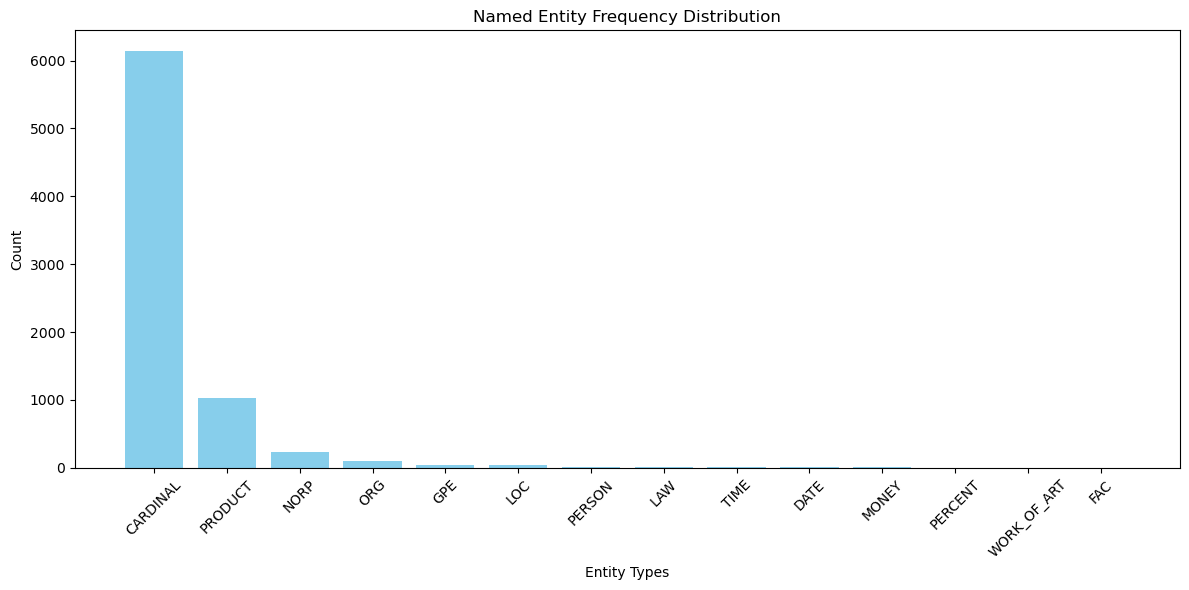

In [70]:
# Plot the Named Entity frequency
plt.figure(figsize=(12, 6))
plt.bar(ner_df_counts['Entity_Label'], ner_df_counts['counts'], color='skyblue')
plt.title('Named Entity Frequency Distribution')
plt.xlabel('Entity Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Text Processing

In [71]:
temp_df

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,8p21.3,GFRA2 - DOK2,rs17428041,intergenic_variant
1,A genome-wide association study suggests an as...,Neuropathic pain in type 2 diabetes,12p13.32,LINC02443 - NTF3,rs11615866,intergenic_variant
2,A Genome-wide Association Study Provides Evide...,Neuropathic pain in type 2 diabetes,1p35.1,ZSCAN20,rs35260355,intron_variant
3,A Genome-wide Association Study Provides Evide...,Neuropathic pain in type 2 diabetes,1p35.1,ZSCAN20,rs71647933,intron_variant
4,A Genome-wide Association Study Provides Evide...,Neuropathic pain in type 2 diabetes,8q23.1,ABRA - HMGB1P46,rs6986153,intergenic_variant
...,...,...,...,...,...,...
3628,"Rare variant analyses in 51,256 type 2 diabete...",Type 2 diabetes,5q11.2,SETD9,rs252924,intron_variant
3629,"Rare variant analyses in 51,256 type 2 diabete...",Type 2 diabetes,15q15.1,BMF,rs11637595,intron_variant
3630,"Rare variant analyses in 51,256 type 2 diabete...",Type 2 diabetes,13q31.3,PPIAP23 - MIR17HG,rs10161911,intergenic_variant
3636,Identification of a Common Variant for Coronar...,Coronary heart disease in type 2 diabetes,2q32.1,PDE1A,rs10171703,intron_variant


Converting to lowercase

In [72]:
temp_df = temp_df.applymap(lambda text: text.lower() if isinstance(text, str) else text)
temp_df

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,a genome-wide association study suggests an as...,neuropathic pain in type 2 diabetes,8p21.3,gfra2 - dok2,rs17428041,intergenic_variant
1,a genome-wide association study suggests an as...,neuropathic pain in type 2 diabetes,12p13.32,linc02443 - ntf3,rs11615866,intergenic_variant
2,a genome-wide association study provides evide...,neuropathic pain in type 2 diabetes,1p35.1,zscan20,rs35260355,intron_variant
3,a genome-wide association study provides evide...,neuropathic pain in type 2 diabetes,1p35.1,zscan20,rs71647933,intron_variant
4,a genome-wide association study provides evide...,neuropathic pain in type 2 diabetes,8q23.1,abra - hmgb1p46,rs6986153,intergenic_variant
...,...,...,...,...,...,...
3628,"rare variant analyses in 51,256 type 2 diabete...",type 2 diabetes,5q11.2,setd9,rs252924,intron_variant
3629,"rare variant analyses in 51,256 type 2 diabete...",type 2 diabetes,15q15.1,bmf,rs11637595,intron_variant
3630,"rare variant analyses in 51,256 type 2 diabete...",type 2 diabetes,13q31.3,ppiap23 - mir17hg,rs10161911,intergenic_variant
3636,identification of a common variant for coronar...,coronary heart disease in type 2 diabetes,2q32.1,pde1a,rs10171703,intron_variant


Removing Stop Words

In [75]:
import pickle
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

# Manually load the Punkt tokenizer
with open('/Users/mohammedbasem/nltk_data/tokenizers/punkt/english.pickle', 'rb') as f:
    punkt_tokenizer = pickle.load(f)

# Custom word tokenization function
def custom_word_tokenize(text):
    sentences = punkt_tokenizer.tokenize(text)
    word_tokenizer = TreebankWordTokenizer()
    tokens = [word_tokenizer.tokenize(sentence) for sentence in sentences]
    return [word for sublist in tokens for word in sublist]

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Apply stopword removal using the custom tokenizer
temp_df = temp_df.applymap(
    lambda text: ' '.join([word for word in custom_word_tokenize(text) if word.lower() not in stop_words]) 
    if isinstance(text, str) else text
)

# Display the cleaned DataFrame
temp_df



,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,genome-wide association study suggests associa...,neuropathic pain type 2 diabetes,8p21.3,gfra2 - dok2,rs17428041,intergenic_variant
1,genome-wide association study suggests associa...,neuropathic pain type 2 diabetes,12p13.32,linc02443 - ntf3,rs11615866,intergenic_variant
2,genome-wide association study provides evidenc...,neuropathic pain type 2 diabetes,1p35.1,zscan20,rs35260355,intron_variant
3,genome-wide association study provides evidenc...,neuropathic pain type 2 diabetes,1p35.1,zscan20,rs71647933,intron_variant
4,genome-wide association study provides evidenc...,neuropathic pain type 2 diabetes,8q23.1,abra - hmgb1p46,rs6986153,intergenic_variant
...,...,...,...,...,...,...
3628,"rare variant analyses 51,256 type 2 diabetes c...",type 2 diabetes,5q11.2,setd9,rs252924,intron_variant
3629,"rare variant analyses 51,256 type 2 diabetes c...",type 2 diabetes,15q15.1,bmf,rs11637595,intron_variant
3630,"rare variant analyses 51,256 type 2 diabetes c...",type 2 diabetes,13q31.3,ppiap23 - mir17hg,rs10161911,intergenic_variant
3636,identification common variant coronary heart d...,coronary heart disease type 2 diabetes,2q32.1,pde1a,rs10171703,intron_variant


Removing Punctuation

In [84]:
# Remove punctuation only for columns except 'MAPPED_GENE'
temp_df.loc[:, temp_df.columns != 'MAPPED_GENE'] = temp_df.loc[:, temp_df.columns != 'MAPPED_GENE'].applymap(
    lambda text: text.translate(str.maketrans('', '', string.punctuation)) if isinstance(text, str) else text
)
temp_df

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,"[genomewide, association, study, suggests, ass...","[neuropathic, pain, type, 2, diabetes]",[8p213],"[gfra2, -, dok2]",[rs17428041],[intergenicvariant]
1,"[genomewide, association, study, suggests, ass...","[neuropathic, pain, type, 2, diabetes]",[12p1332],"[linc02443, -, ntf3]",[rs11615866],[intergenicvariant]
2,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[1p351],[zscan20],[rs35260355],[intronvariant]
3,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[1p351],[zscan20],[rs71647933],[intronvariant]
4,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[8q231],"[abra, -, hmgb1p46]",[rs6986153],[intergenicvariant]
...,...,...,...,...,...,...
3628,"[rare, variant, analyses, 51256, type, 2, diab...","[type, 2, diabetes]",[5q112],[setd9],[rs252924],[intronvariant]
3629,"[rare, variant, analyses, 51256, type, 2, diab...","[type, 2, diabetes]",[15q151],[bmf],[rs11637595],[intronvariant]
3630,"[rare, variant, analyses, 51256, type, 2, diab...","[type, 2, diabetes]",[13q313],"[ppiap23, -, mir17hg]",[rs10161911],[intergenicvariant]
3636,"[identification, common, variant, coronary, he...","[coronary, heart, disease, type, 2, diabetes]",[2q321],[pde1a],[rs10171703],[intronvariant]


Tokenizing

In [86]:
# Apply custom tokenizer to all text columns
temp_df = temp_df.applymap(lambda text: custom_word_tokenize(text) if isinstance(text, str) else text)

# Display the DataFrame
import pandas as pd
from IPython.display import display

display(temp_df.head())  # Show the first few rows

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,"[genomewide, association, study, suggests, ass...","[neuropathic, pain, type, 2, diabetes]",[8p213],"[gfra2, -, dok2]",[rs17428041],[intergenicvariant]
1,"[genomewide, association, study, suggests, ass...","[neuropathic, pain, type, 2, diabetes]",[12p1332],"[linc02443, -, ntf3]",[rs11615866],[intergenicvariant]
2,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[1p351],[zscan20],[rs35260355],[intronvariant]
3,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[1p351],[zscan20],[rs71647933],[intronvariant]
4,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[8q231],"[abra, -, hmgb1p46]",[rs6986153],[intergenicvariant]


Lemmatizing

In [87]:
lemmatizer = WordNetLemmatizer()

# Lemmatize all tokenized text columns in temp_df
temp_df = temp_df.applymap(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens] if isinstance(tokens, list) else tokens)
temp_df

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,"[genomewide, association, study, suggests, ass...","[neuropathic, pain, type, 2, diabetes]",[8p213],"[gfra2, -, dok2]",[rs17428041],[intergenicvariant]
1,"[genomewide, association, study, suggests, ass...","[neuropathic, pain, type, 2, diabetes]",[12p1332],"[linc02443, -, ntf3]",[rs11615866],[intergenicvariant]
2,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[1p351],[zscan20],[rs35260355],[intronvariant]
3,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[1p351],[zscan20],[rs71647933],[intronvariant]
4,"[genomewide, association, study, provides, evi...","[neuropathic, pain, type, 2, diabetes]",[8q231],"[abra, -, hmgb1p46]",[rs6986153],[intergenicvariant]
...,...,...,...,...,...,...
3628,"[rare, variant, analysis, 51256, type, 2, diab...","[type, 2, diabetes]",[5q112],[setd9],[rs252924],[intronvariant]
3629,"[rare, variant, analysis, 51256, type, 2, diab...","[type, 2, diabetes]",[15q151],[bmf],[rs11637595],[intronvariant]
3630,"[rare, variant, analysis, 51256, type, 2, diab...","[type, 2, diabetes]",[13q313],"[ppiap23, -, mir17hg]",[rs10161911],[intergenicvariant]
3636,"[identification, common, variant, coronary, he...","[coronary, heart, disease, type, 2, diabetes]",[2q321],[pde1a],[rs10171703],[intronvariant]


First value of each column

In [88]:
# Display the full first value of each column from the original temp_df
for column in temp_df.columns:
    first_value = temp_df[column].iloc[0]
    print(f"\n{column}:\n{first_value}")


STUDY:
['genomewide', 'association', 'study', 'suggests', 'association', 'chr8p213', 'gfra2', 'diabetic', 'neuropathic', 'pain']

DISEASE_DESCRIPTION:
['neuropathic', 'pain', 'type', '2', 'diabetes']

REGION:
['8p213']

MAPPED_GENE:
['gfra2', '-', 'dok2']

SNPS:
['rs17428041']

GENOMIC_CONTEXT:
['intergenicvariant']


# Text Tagging (POS)

#### Parts of speech (POS)

In [89]:
# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Function to apply POS tagging using spaCy
def spacy_pos_tag(tokens):
    if isinstance(tokens, list):
        doc = nlp(' '.join(tokens))  # Convert list of tokens back to text for spaCy processing
        return [(token.text, token.pos_) for token in doc]
    return []

# Apply spaCy POS tagging to tokenized data
pos_df = temp_df.applymap(spacy_pos_tag)

# Display the DataFrame
pos_df.head()

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,"[(genomewide, PROPN), (association, NOUN), (st...","[(neuropathic, ADJ), (pain, NOUN), (type, NOUN...","[(8p213, X)]","[(gfra2, NOUN), (-, PUNCT), (dok2, PROPN)]","[(rs17428041, NOUN)]","[(intergenicvariant, ADJ)]"
1,"[(genomewide, PROPN), (association, NOUN), (st...","[(neuropathic, ADJ), (pain, NOUN), (type, NOUN...","[(12p1332, NUM)]","[(linc02443, NOUN), (-, PUNCT), (ntf3, NOUN)]","[(rs11615866, PROPN)]","[(intergenicvariant, ADJ)]"
2,"[(genomewide, PROPN), (association, NOUN), (st...","[(neuropathic, ADJ), (pain, NOUN), (type, NOUN...","[(1p351, NUM)]","[(zscan20, PROPN)]","[(rs35260355, NOUN)]","[(intronvariant, NOUN)]"
3,"[(genomewide, PROPN), (association, NOUN), (st...","[(neuropathic, ADJ), (pain, NOUN), (type, NOUN...","[(1p351, NUM)]","[(zscan20, PROPN)]","[(rs71647933, NOUN)]","[(intronvariant, NOUN)]"
4,"[(genomewide, PROPN), (association, NOUN), (st...","[(neuropathic, ADJ), (pain, NOUN), (type, NOUN...","[(8q231, NUM)]","[(abra, NOUN), (-, PUNCT), (hmgb1p46, NOUN)]","[(rs6986153, NOUN)]","[(intergenicvariant, ADJ)]"


In [90]:
# Flatten all token-POS pairs into a single list
all_pos_tags = [tag for column in pos_df.columns for row in pos_df[column].dropna() for tag in row]

# Count occurrences of each (token, POS) pair
pos_counts_df = pd.DataFrame(Counter(all_pos_tags).items(), columns=['Token_POS', 'Count'])
pos_counts_df[['Token', 'POS_Tag']] = pd.DataFrame(pos_counts_df['Token_POS'].tolist(), index=pos_counts_df.index)
pos_counts_df.drop(columns=['Token_POS'], inplace=True)
pos_counts_df = pos_counts_df.sort_values(by='Count', ascending=False)

# Reorder columns to have 'Count' as the last column
pos_counts_df = pos_counts_df[['Token', 'POS_Tag', 'Count']]

# Display the updated DataFrame
pos_counts_df.head(10)

,Token,POS_Tag,Count
26,diabetes,NOUN,6410
24,type,NOUN,6186
25,2,NUM,6176
4809,intronvariant,NOUN,1827
40,locus,NOUN,1741
875,-,PUNCT,1364
97,new,ADJ,1161
106,metaanalysis,NOUN,1115
37,risk,NOUN,1073
98,related,VERB,1038


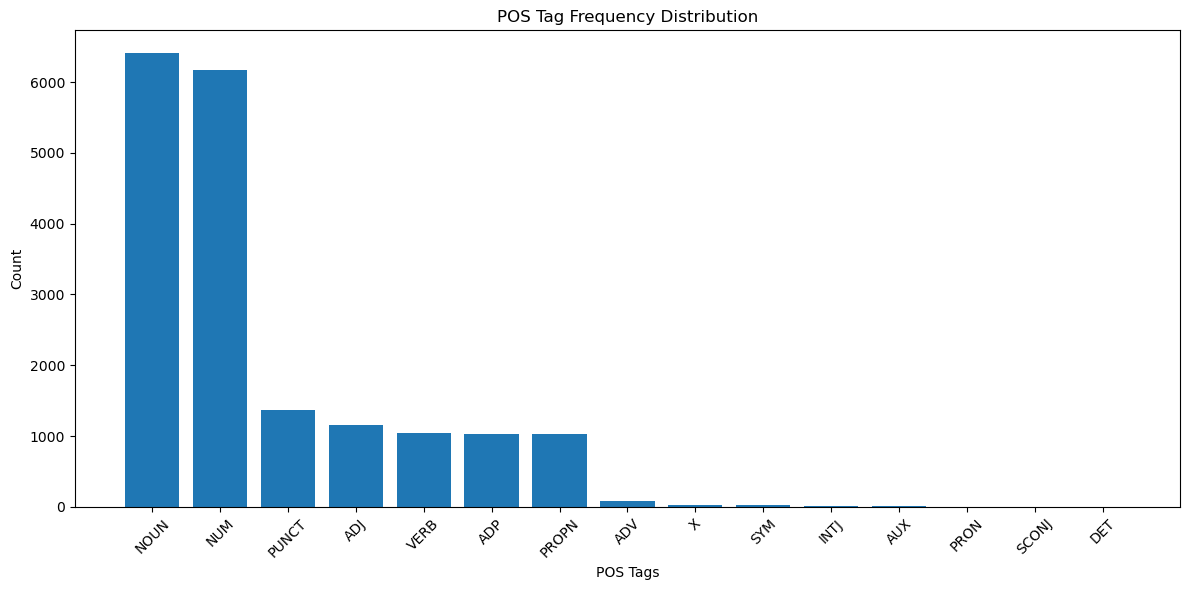

In [91]:
# Plot the POS tag frequencies
plt.figure(figsize=(12, 6))
plt.bar(pos_counts_df['POS_Tag'], pos_counts_df['Count'])
plt.title('POS Tag Frequency Distribution')
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
propn = pos_counts_df[pos_counts_df['POS_Tag'].isin(['PROPN'])]
propn

,Token,POS_Tag,Count
95,discovery,PROPN,1027
309,multiancestry,PROPN,427
0,genomewide,PROPN,393
46,isletspecific,PROPN,381
57,association,PROPN,337
...,...,...,...
2447,c16orf74,PROPN,1
2448,emc8,PROPN,1
2449,umodl1,PROPN,1
2450,abcg1,PROPN,1


In [93]:
pos_counts_poscounts = pos_counts_df.groupby(['POS_Tag'])['Token'].count().sort_values(ascending=False)
pos_counts_poscounts.head(10)

POS_Tag
PROPN    1970
NOUN     1587
NUM       427
VERB      363
ADJ       141
X         128
PUNCT     107
ADV        38
ADP        29
PRON       19
Name: Token, dtype: int64

Unigrams

In [94]:
unigrams_df = temp_df.applymap(lambda tokens: list(ngrams(tokens, 1)) if isinstance(tokens, list) else [])
unigrams_df

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,"[(genomewide,), (association,), (study,), (sug...","[(neuropathic,), (pain,), (type,), (2,), (diab...","[(8p213,)]","[(gfra2,), (-,), (dok2,)]","[(rs17428041,)]","[(intergenicvariant,)]"
1,"[(genomewide,), (association,), (study,), (sug...","[(neuropathic,), (pain,), (type,), (2,), (diab...","[(12p1332,)]","[(linc02443,), (-,), (ntf3,)]","[(rs11615866,)]","[(intergenicvariant,)]"
2,"[(genomewide,), (association,), (study,), (pro...","[(neuropathic,), (pain,), (type,), (2,), (diab...","[(1p351,)]","[(zscan20,)]","[(rs35260355,)]","[(intronvariant,)]"
3,"[(genomewide,), (association,), (study,), (pro...","[(neuropathic,), (pain,), (type,), (2,), (diab...","[(1p351,)]","[(zscan20,)]","[(rs71647933,)]","[(intronvariant,)]"
4,"[(genomewide,), (association,), (study,), (pro...","[(neuropathic,), (pain,), (type,), (2,), (diab...","[(8q231,)]","[(abra,), (-,), (hmgb1p46,)]","[(rs6986153,)]","[(intergenicvariant,)]"
...,...,...,...,...,...,...
3628,"[(rare,), (variant,), (analysis,), (51256,), (...","[(type,), (2,), (diabetes,)]","[(5q112,)]","[(setd9,)]","[(rs252924,)]","[(intronvariant,)]"
3629,"[(rare,), (variant,), (analysis,), (51256,), (...","[(type,), (2,), (diabetes,)]","[(15q151,)]","[(bmf,)]","[(rs11637595,)]","[(intronvariant,)]"
3630,"[(rare,), (variant,), (analysis,), (51256,), (...","[(type,), (2,), (diabetes,)]","[(13q313,)]","[(ppiap23,), (-,), (mir17hg,)]","[(rs10161911,)]","[(intergenicvariant,)]"
3636,"[(identification,), (common,), (variant,), (co...","[(coronary,), (heart,), (disease,), (type,), (...","[(2q321,)]","[(pde1a,)]","[(rs10171703,)]","[(intronvariant,)]"


Bigrams

In [95]:
bigrams_df = temp_df.applymap(lambda tokens: list(ngrams(tokens, 2)) if isinstance(tokens, list) else [])
bigrams_df

,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,"[(genomewide, association), (association, stud...","[(neuropathic, pain), (pain, type), (type, 2),...",[],"[(gfra2, -), (-, dok2)]",[],[]
1,"[(genomewide, association), (association, stud...","[(neuropathic, pain), (pain, type), (type, 2),...",[],"[(linc02443, -), (-, ntf3)]",[],[]
2,"[(genomewide, association), (association, stud...","[(neuropathic, pain), (pain, type), (type, 2),...",[],[],[],[]
3,"[(genomewide, association), (association, stud...","[(neuropathic, pain), (pain, type), (type, 2),...",[],[],[],[]
4,"[(genomewide, association), (association, stud...","[(neuropathic, pain), (pain, type), (type, 2),...",[],"[(abra, -), (-, hmgb1p46)]",[],[]
...,...,...,...,...,...,...
3628,"[(rare, variant), (variant, analysis), (analys...","[(type, 2), (2, diabetes)]",[],[],[],[]
3629,"[(rare, variant), (variant, analysis), (analys...","[(type, 2), (2, diabetes)]",[],[],[],[]
3630,"[(rare, variant), (variant, analysis), (analys...","[(type, 2), (2, diabetes)]",[],"[(ppiap23, -), (-, mir17hg)]",[],[]
3636,"[(identification, common), (common, variant), ...","[(coronary, heart), (heart, disease), (disease...",[],[],[],[]


# Vectorizing Text

In [96]:
# Load BioBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.1")
model = AutoModel.from_pretrained("dmis-lab/biobert-base-cased-v1.1")

# Function to convert token lists to strings and apply BioBERT embeddings
def get_biobert_embedding(text):
    # Check if data is a list of tokens; convert to string if needed
    if isinstance(text, list):
        text = ' '.join(text)
    
    # Apply BioBERT only if the text is a valid non-empty string
    if isinstance(text, str) and text.strip():
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    
    return None  # Return None for empty or invalid entries

# Apply BioBERT embeddings to each column
biobert_embeddings_df = temp_df.applymap(get_biobert_embedding)

# Display the DataFrame with BioBERT embeddings
biobert_embeddings_df.head()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


,STUDY,DISEASE_DESCRIPTION,REGION,MAPPED_GENE,SNPS,GENOMIC_CONTEXT
0,"[-0.014761597, 0.050946325, 0.026996017, 0.073...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.30574775, -0.247294, -0.17547245, 0.2790337...","[0.11567839, 0.04506362, -0.052473105, 0.26954...","[0.3833661, -0.043935362, 0.059416465, 0.30476...","[0.3786802, -0.11601055, -0.2062005, -0.332781..."
1,"[-0.014761597, 0.050946325, 0.026996017, 0.073...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.3673902, -0.39268562, 0.106864356, 0.358466...","[0.21006574, -0.2481431, -0.004312572, 0.27832...","[0.23716477, -0.14715259, 0.04056697, 0.384563...","[0.3786802, -0.11601055, -0.2062005, -0.332781..."
2,"[0.15346734, -0.12133449, 0.07480221, 0.139887...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.32831752, -0.02226849, 0.059755575, 0.03182...","[0.22619046, -0.34641346, 0.029787406, -0.0352...","[0.22269733, -0.019778334, 0.03516602, 0.25661...","[0.23085272, -0.15324669, -0.05975801, -0.2405..."
3,"[0.15346734, -0.12133449, 0.07480221, 0.139887...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.32831752, -0.02226849, 0.059755575, 0.03182...","[0.22619046, -0.34641346, 0.029787406, -0.0352...","[0.13912748, -0.17328435, 0.1082057, 0.4097632...","[0.23085272, -0.15324669, -0.05975801, -0.2405..."
4,"[0.15346734, -0.12133449, 0.07480221, 0.139887...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.28285083, -0.11195102, 0.029911978, 0.32808...","[0.32850763, -0.29260284, -0.25746247, 0.07688...","[0.21559618, -0.084607154, 0.099933766, 0.2888...","[0.3786802, -0.11601055, -0.2062005, -0.332781..."


# Topic Modelling

Latent Dirichlet Allocation (LDA)

In [97]:
# Function to apply LDA to a column
def apply_lda_to_column(column_data):
    text_data = column_data.apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(text_data)
    
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(doc_term_matrix)
    
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [words[i] for i in topic.argsort()[:-11:-1]]
        topics.append(f"Topic {topic_idx+1}: {', '.join(top_words)}")
    return topics

# Apply LDA to each column
for col in temp_df.columns:
    print(f"\n--- LDA Topics for Column: {col} ---")
    topics = apply_lda_to_column(temp_df[col])
    for topic in topics:
        print(topic)


--- LDA Topics for Column: STUDY ---
Topic 1: diabetes, type, locus, finemapping, variant, identification, imputation, map, epigenome, singlevariant
Topic 2: risk, locus, new, type, diabetes, metaanalysis, related, vascular, participant, outcome
Topic 3: association, genetic, atlas, phenotype, 220, crosspopulation, human, diabetic, disease, genomewide
Topic 4: study, type, diabetes, population, genetic, discovery, power, multiancestry, translation, diverse
Topic 5: diabetes, association, genomewide, analysis, type, genetic, provides, insight, architecture, newly

--- LDA Topics for Column: DISEASE_DESCRIPTION ---
Topic 1: type, diabetes, yuzhi, constitution, complication, macrovascular, ophthalmic, nephropathy, pain, neuropathic
Topic 2: diabetes, type, pain, neuropathic, nephropathy, agerelated, schizophrenia, severe, insulindeficient, adjusted
Topic 3: diabetes, type, adjusted, bmi, artery, coronary, disease, insulindeficient, severe, calcification
Topic 4: type, diabetes, response,

Latent Semantic Analysis (LSA)

In [98]:
# Function to apply LSA to a column
def apply_lsa_to_column(column_data):
    text_data = column_data.apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(text_data)
    
    lsa = TruncatedSVD(n_components=5, random_state=42)
    lsa.fit(tfidf_matrix)
    
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lsa.components_):
        top_words = [words[i] for i in topic.argsort()[:-11:-1]]
        topics.append(f"Topic {topic_idx+1}: {', '.join(top_words)}")
    return topics

# Apply LSA to each column
for col in temp_df.columns:
    print(f"\n--- LSA Topics for Column: {col} ---")
    topics = apply_lsa_to_column(temp_df[col])
    for topic in topics:
        print(topic)


--- LSA Topics for Column: STUDY ---
Topic 1: 14, participant, vascular, outcome, 318, million, related, risk, metaanalysis, new
Topic 2: diverse, translation, power, highlight, population, genetic, study, diabetes, type, discovery
Topic 3: singlevariant, resolution, highdensity, isletspecific, using, map, epigenome, imputation, finemapping, locus
Topic 4: monogenic, reveal, 370487, spectrum, 51256, pathogenicity, control, case, rare, gene
Topic 5: identification, asian, east, 433540, individual, locus, susceptibility, japanese, 28, genomewide

--- LSA Topics for Column: DISEASE_DESCRIPTION ---
Topic 1: type, diabetes, adjusted, bmi, severe, mild, agerelated, insulindeficient, autoimmune, obesityrelated
Topic 2: adjusted, bmi, rate, filtration, glomerular, early, glycemic, metformin, alpha2glycoprotein, leucinerich
Topic 3: severe, insulindeficient, autoimmune, insulinresistant, retinopathy, diabetic, proliferative, sightthreatening, macular, edema
Topic 4: mild, agerelated, obesityre

Non-Negative Matrix Factorization (NMF)

In [99]:
# Function to apply NMF to a column
def apply_nmf_to_column(column_data):
    text_data = column_data.apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(text_data)
    
    nmf = NMF(n_components=5, random_state=42)
    nmf.fit(tfidf_matrix)
    
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(nmf.components_):
        top_words = [words[i] for i in topic.argsort()[:-11:-1]]
        topics.append(f"Topic {topic_idx+1}: {', '.join(top_words)}")
    return topics

# Apply NMF to each column
for col in temp_df.columns:
    print(f"\n--- NMF Topics for Column: {col} ---")
    topics = apply_nmf_to_column(temp_df[col])
    for topic in topics:
        print(topic)


--- NMF Topics for Column: STUDY ---
Topic 1: 14, 318, million, participant, outcome, vascular, related, risk, metaanalysis, new
Topic 2: diverse, translation, power, highlight, genetic, population, study, multiancestry, discovery, type
Topic 3: epigenome, singlevariant, resolution, map, highdensity, using, isletspecific, imputation, finemapping, locus
Topic 4: pathogenicity, spectrum, 51256, reveal, monogenic, 370487, control, case, rare, gene
Topic 5: identification, asian, east, 433540, individual, locus, type, susceptibility, japanese, diabetes

--- NMF Topics for Column: DISEASE_DESCRIPTION ---
Topic 1: type, diabetes, yuzhi, constitution, diabetic, nephropathy, retinopathy, level, complication, macrovascular
Topic 2: adjusted, bmi, diabetes, type, calcification, cardiovascular, excluding, prevalent, insulindeficient, coronary
Topic 3: severe, insulindeficient, autoimmune, insulinresistant, retinopathy, diabetic, diabetes, type, proliferative, sightthreatening
Topic 4: mild, ager

# Saving CSV file

Replace modified categorical data back into the original dataset

In [100]:
genetic_df[categorical_columns] = biobert_embeddings_df
genetic_df.head()

,STUDY,DISEASE_DESCRIPTION,REGION,CHR_ID,CHR_POS,MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,SNPS,MERGED,GENOMIC_CONTEXT,INTERGENIC,RISK_ALLELE_FREQUENCY,PVALUE,PVALUE_MLOG,EFFECT_SIZE,CASE_PERCENTAGE,CI_LOWER_BOUND,CI_UPPER_BOUND,CI_RANGE,SNPS_PASSING_QC,PLATFORM_AFFYMETRIX,PLATFORM_AFFYMETRIX_ILLUMINA,PLATFORM_ILLUMINA,IMPUTED_ENCODED,RISK_ALLELE_ENCODED
0,"[-0.014761597, 0.050946325, 0.026996017, 0.073...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.30574775, -0.247294, -0.17547245, 0.2790337...",8,21853920,"[0.11567839, 0.04506362, -0.052473105, 0.26954...",168546,147443,<NA>,41563,54953,"[0.3833661, -0.043935362, 0.059416465, 0.30476...",0,"[0.3786802, -0.11601055, -0.2062005, -0.332781...",1,0.7092,2.000000e-07,6.698970,1.49,18.674502,0.46,0.56,0.09,6494962,0,1,0,1,0
1,"[-0.014761597, 0.050946325, 0.026996017, 0.073...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.3673902, -0.39268562, 0.106864356, 0.358466...",12,5284163,"[0.21006574, -0.2481431, -0.004312572, 0.27832...",256115,185652,<NA>,39964,147945,"[0.23716477, -0.14715259, 0.04056697, 0.384563...",0,"[0.3786802, -0.11601055, -0.2062005, -0.332781...",1,0.1200,1.000000e-06,6.000000,2.26,18.674502,0.46,0.56,0.09,6494962,0,1,0,1,0
2,"[0.15346734, -0.12133449, 0.07480221, 0.139887...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.32831752, -0.02226849, 0.059755575, 0.03182...",1,33480230,"[0.22619046, -0.34641346, 0.029787406, -0.0352...",<NA>,<NA>,121903,<NA>,<NA>,"[0.22269733, -0.019778334, 0.03516602, 0.25661...",0,"[0.23085272, -0.15324669, -0.05975801, -0.2405...",0,0.1600,4.000000e-07,6.397940,1.66,22.767117,1.37,2.02,0.65,6906962,0,1,0,1,0
3,"[0.15346734, -0.12133449, 0.07480221, 0.139887...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.32831752, -0.02226849, 0.059755575, 0.03182...",1,33480000,"[0.22619046, -0.34641346, 0.029787406, -0.0352...",<NA>,<NA>,121903,<NA>,<NA>,"[0.13912748, -0.17328435, 0.1082057, 0.4097632...",0,"[0.23085272, -0.15324669, -0.05975801, -0.2405...",0,0.1600,3.000000e-07,6.522879,2.31,22.767117,1.68,3.17,1.49,6906962,0,1,0,1,1
4,"[0.15346734, -0.12133449, 0.07480221, 0.139887...","[0.158013, 0.009363345, -0.006814745, 0.056087...","[0.28285083, -0.11195102, 0.029911978, 0.32808...",8,107059816,"[0.32850763, -0.29260284, -0.25746247, 0.07688...",174429,254146,<NA>,289572,113384,"[0.21559618, -0.084607154, 0.099933766, 0.2888...",0,"[0.3786802, -0.11601055, -0.2062005, -0.332781...",1,0.1900,8.000000e-07,6.096910,1.67,22.767117,1.34,2.08,0.74,6906962,0,1,0,1,1


Dividing into two datasets according to SNP Gene

In [87]:
# Split the data into two based on the condition provided
# Data containing UPSTREAM_GENE_ID, DOWNSTREAM_GENE_ID, UPSTREAM_GENE_DISTANCE, DOWNSTREAM_GENE_DISTANCE
inter_genetic_dataset = genetic_df.dropna(subset=['UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE'])
inter_genetic_dataset = inter_genetic_dataset.drop(columns=['SNP_GENE_IDS'])  # Remove SNP_GENE_IDS column
 
# Data containing SNP_GENE_IDS but not UPSTREAM_GENE_ID, DOWNSTREAM_GENE_ID, UPSTREAM_GENE_DISTANCE, DOWNSTREAM_GENE_DISTANCE
normal_genetic_dataset = genetic_df.dropna(subset=['SNP_GENE_IDS'])
normal_genetic_dataset = normal_genetic_dataset.drop(columns=['UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE'])
 
# Save the two datasets as CSV files in the specified directory
output_path_1 = r'C:\Users\dahab\OneDrive\Desktop\T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making\datasets\genetic\inter_genetic_dataset.csv'
output_path_2 = r'C:\Users\dahab\OneDrive\Desktop\T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making\datasets\genetic\normal_genetic_dataset.csv'
 
inter_genetic_dataset.to_csv(output_path_1, index=False)
normal_genetic_dataset.to_csv(output_path_2, index=False)
 
# Output paths
print(f"Data 1 saved to: {output_path_1}")
print(f"Data 2 saved to: {output_path_2}")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 851-852: truncated \UXXXXXXXX escape (4047496473.py, line 19)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Comparison between defect on specific gene or between two genes

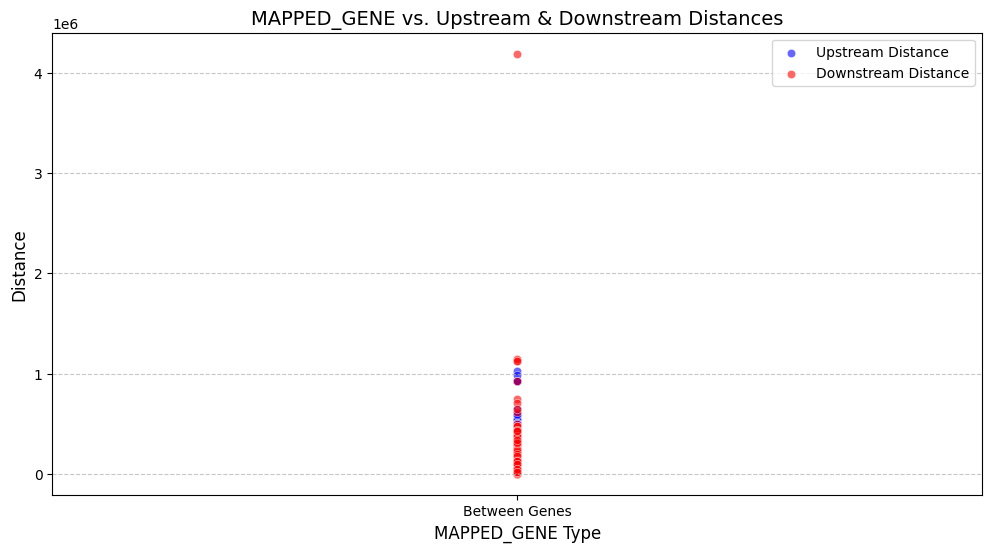

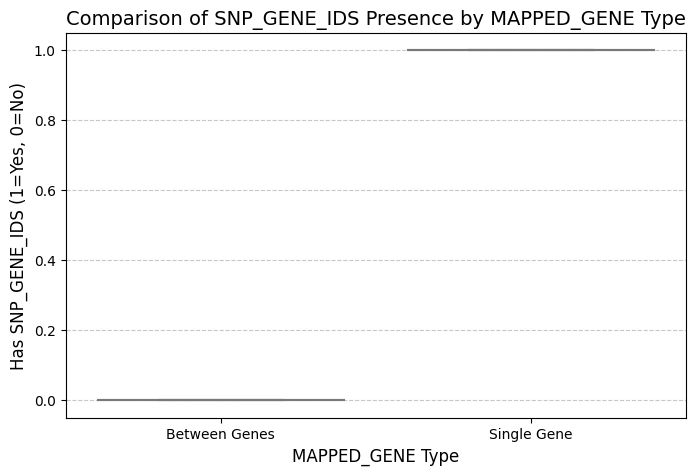

In [67]:
# Filter datasets for MAPPED_GENE types
between_genes = genetic_df[genetic_df["MAPPED_GENE"].str.contains(" - ", na=False)]
single_gene = genetic_df[~genetic_df["MAPPED_GENE"].str.contains(" - ", na=False)]

# Scatter plot for Upstream and Downstream Distances
plt.figure(figsize=(12, 6))
sns.scatterplot(x=["Between Genes"] * len(between_genes), y=between_genes["UPSTREAM_GENE_DISTANCE"], color="blue", label="Upstream Distance", alpha=0.6)
sns.scatterplot(x=["Between Genes"] * len(between_genes), y=between_genes["DOWNSTREAM_GENE_DISTANCE"], color="red", label="Downstream Distance", alpha=0.6)
sns.scatterplot(x=["Single Gene"] * len(single_gene), y=single_gene["UPSTREAM_GENE_DISTANCE"], color="blue", alpha=0.6)
sns.scatterplot(x=["Single Gene"] * len(single_gene), y=single_gene["DOWNSTREAM_GENE_DISTANCE"], color="red", alpha=0.6)
plt.title("MAPPED_GENE vs. Upstream & Downstream Distances", fontsize=14)
plt.xlabel("MAPPED_GENE Type", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot to compare SNP_GENE_IDS presence
plt.figure(figsize=(8, 5))
sns.boxplot(x=["Between Genes"] * len(between_genes) + ["Single Gene"] * len(single_gene), 
            y=between_genes["SNP_GENE_IDS"].notna().astype(int).tolist() + single_gene["SNP_GENE_IDS"].notna().astype(int).tolist(), 
            palette="coolwarm")
plt.title("Comparison of SNP_GENE_IDS Presence by MAPPED_GENE Type", fontsize=14)
plt.xlabel("MAPPED_GENE Type", fontsize=12)
plt.ylabel("Has SNP_GENE_IDS (1=Yes, 0=No)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Conclusion